<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/testovoe_WSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

**Анализ данных**

1. Пропуски в признаках `insolation_value`, `insolation_ratio` и `power_ratio` составляют 1,2%.
2. Объем данных варьируется по месяцам: больше всего данных для летних месяцев — июня и июля.
3. В 2021 году объем данных оказался наименьшим.
4. В пятницу и субботу (выходные) собрано наибольшее количество данных.
5. Наибольший объем данных приходится на временной интервал с 8 до 16 часов.
6. Сезонность `power_value` зависит от времени суток и времени года.
7. Присутствует сильная корреляция `power_value` с признаками `altitude`, `isolation_value`, `isolation_max`, `isolation_ratio` и `power_max`.
8. Распределение данных по годам для `power_value` оказалось однородным.
9. Наибольшие суммы `power_value` были получены в июле и августе 2023 года, а также в первые числа месяца и по субботам. Наибольшие значения зафиксированы с 11 до 13 часов. Чем больше продолжительность светового дня и угол освещения, тем выше значение `power_value`.
10. Средние значения по признаку показывают, что в августе `power_value` был максимальным. Тенденция первого числа месяца также сохранилась, как и пиковые значения с 11 до 13 часов по пятницам и субботам.
11. Медианные значения подтверждают выводы о закономерностях по месяцам, первым числам месяца, часам и дням недели, а также по годам.
12. Пропуски во временных данных составляют около 6% за все годы: в 2021 году — 12,88%, в 2022 — 3,01%, в 2023 — 3,29%, в 2024 — 5,63%. Это, возможно, объясняет наименьшую сумму `power_value` в 2021 году, хотя средние и медианные значения по годам остались стабильными.
13. По целевой переменной наблюдаются сезонные изменения и тренд.
14. Сезонности включают ежедневные (hourly), недельные (слабо выраженные), месячные и годовые паттерны. Эти результаты получены с использованием скользящих средних и декомпозиции ряда.
15. По автокорреляции виден восходящий тренд в течение всего периода и выраженные сезонные колебания. Выявлены корреляции на 2-м и 16-м лагах с временной дискретностью в один день, что указывает на зависимость среди целевого признака, которую можно использовать при обучении.
16. По автокорреляции с дневной дискретностью видны сезонные зависимости на 12-часовых и 2-часовых интервалах, что окажется полезным для обучения модели.
17. Анализ лагов среди признаков и целевой переменной `power_value` показал, что `isolation_value` имеет значимый лаг в 12 часов с положительной корреляцией, `minutes_of_daylight` — лаг в 8 часов, `part_of_the_day` — лаг в 4 часа. Эти лаги можно использовать для создания новых признаков.
18. Целевая переменная имеет экспоненциальное распределение, поэтому были проведены преобразования и проверка на выбросы — выбросов не обнаружено.
19. Признак `cloud` имеет ошибки в 355 случаях (около 7,8%) по отношению к `power_value` при базовом пороге 0,5. При высокой облачности зафиксирована высокая энергия, что указывает на возможную неточность прогноза.

**Генерация новых признаков и разметка данных**

1. На основе временных данных созданы новые признаки: синусы и косинусы временных характеристик, а также указаны праздничные дни, в которые предприятия работают меньше, что влияет на погодные условия и прогнозы облачности. Лаги не добавлялись по признакам и целевым значениям, хотя корреляция видна, также не применялись скользящие средние и медианы. Выбор признаков обусловлен возможностью их использования для прогноза.
2. На этапе предобработки данные были очищены от пропусков и дополнены, но масштабирование не применялось, так как используются бустинг-модели, не зависящие от линейности. Были удалены высококоррелированные признаки (`insolation_value`, `insolation_ratio`, `insolation_max`), но коллинеарность не является критичной для бустинг-моделей.

**Построение моделей**

1. Построена базовая модель со скользящим средним, которая оценивается по метрикам MAE, R^2 = 0,45, и sMAPE = 57. Такая модель дает приемлемую оценку логичности выбранного метода.
2. Обучение модели с CatBoost. В качестве отложенной выборки использовался 2024 год, а для обучения — данные за 2021-2023 годы. Модель с базовыми настройками показала R^2 = 0,99 по сравнению с базовой 0,45, что подтверждает значительный прирост информативности.
3. Анализ важности признаков показал, что `power_ratio` и `max_power` имеют наибольшее значение. Их зависимость от целевого признака не является линейной, а скорее экспоненциальной. Эти признаки являются расчетными и не будут использоваться в прогнозах.
4. При добавлении лагов, которые имеют значительную корреляцию (например, `power_value_lag`, `clouds_lag`, `hour_sin_lag`, `part_of_the_daylight_lag`), качество модели улучшилось: R^2 вырос до 0,91, а sMAPE снизилось до 44.
5. Проведено рекурсивное удаление нерелевантных признаков с помощью RFECV, в результате чего осталось 27 признаков, что снизило качество модели на 3 пункта (до R^2 = 0,88), но является приемлемым результатом.
6. Настройка гиперпараметров с использованием случайного поиска позволила сократить время выполнения; при этом использовался TimeSeriesSplit, чтобы MAE не делала акцент на выбросах.
7. Построенная модель с оптимизированными гиперпараметрами и отобранными признаками, с использованием Huber Loss для компромисса между MAE и MSE.

**Оценка остатков**

1. Построен график распределения остатков и прогноза для анализа их положения относительно нуля и выявления выбросов. Проверка на стационарность и зависимости показала, что остатки имеют вид белого шума.

*P.S. Работа над данным проектом была интересной и полезной. Возникли вопросы, которые хотелось бы обсудить на новом рабочем месте!*

---


In [1]:
import pandas as pd

# Замените 'your_file.csv' на путь к вашему файлу
df = pd.read_csv('38.csv')
df_1 = pd.read_csv('38.csv')

# Проверка первых строк для уверенности, что данные загружены правильно
df.head()

date_time_clouds  clouds  insolation_value  power_value  \
0  2021-01-01 08:00:00   0.291          2.719515     0.510000   
1  2021-01-01 09:00:00   0.299         26.143628     2.280000   
2  2021-01-01 10:00:00   0.291         52.785677     4.556000   
3  2021-01-01 11:00:00   0.291        112.734060    11.151290   
4  2021-01-01 12:00:00   0.292        222.726500    26.058584   

   minutes_of_daylight  part_of_the_daylight  morning  afternoon  evening  \
0                530.0              0.018868        1          0        0   
1                530.0              0.132075        1          0        0   
2                530.0              0.245283        1          0        0   
3                530.0              0.358491        0          1        0   
4                530.0              0.471698        0          1        0   

       angle   altitude  month  insolation_max  insolation_ratio  \
0 -23.011637   0.601486      1        3.877965          0.701274   
1 -23.011637   8.716971      1      126.001728          0.207486   
2 -23.011637  15.272744      1      259.056565          0.203761   
3 -23.011637  19.782853      1      359.199595          0.313848   
4 -23.011637  21.812232      1      405.681435          0.549018   

   cloud_insolation_product  cloud_altitude_product  max_power  power_ratio  
0                  1.128488                0.175032   2.094194     0.243530  
1                 37.674517                2.606374  29.968810     0.076079  
2                 75.385460                4.444369  51.993808     0.087626  
3                104.527082                5.756810  66.750809     0.167059  
4                118.458979                6.369172  73.258227     0.355709

АНАЛИЗ ДАННЫХ


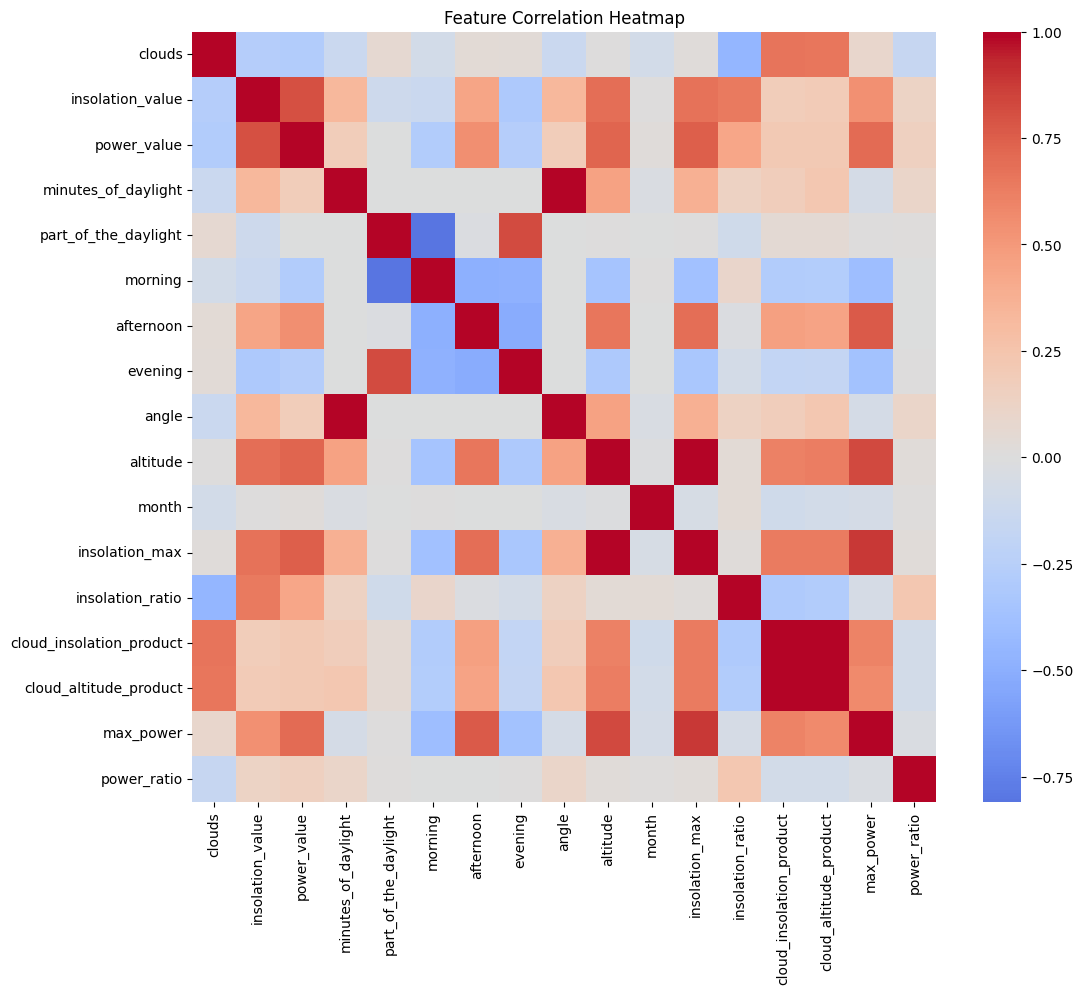

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])

# Расчет корреляционной матрицы для признаков
correlation_matrix = numeric_df.corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


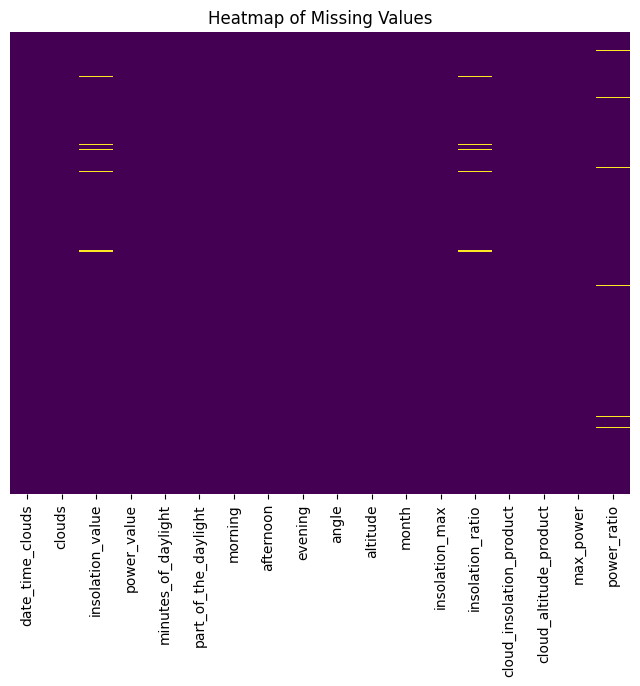

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Построение тепловой карты пропусков
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time_clouds          14560 non-null  object 
 1   clouds                    14560 non-null  float64
 2   insolation_value          14376 non-null  float64
 3   power_value               14560 non-null  float64
 4   minutes_of_daylight       14560 non-null  float64
 5   part_of_the_daylight      14560 non-null  float64
 6   morning                   14560 non-null  int64  
 7   afternoon                 14560 non-null  int64  
 8   evening                   14560 non-null  int64  
 9   angle                     14560 non-null  float64
 10  altitude                  14560 non-null  float64
 11  month                     14560 non-null  int64  
 12  insolation_max            14560 non-null  float64
 13  insolation_ratio          14376 non-null  float64
 14  cloud_

In [5]:
# Рассчитаем процент пропусков для каждого столбца
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Оставим только столбцы с пропусками
missing_percentage.name='Percent_nan'
missing_percentage

insolation_value    1.263736
insolation_ratio    1.263736
power_ratio         1.153846
Name: Percent_nan, dtype: float64

In [6]:
# Удаление строк с пропусками из датафрейма
df = df.dropna().copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14211 entries, 0 to 14559
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time_clouds          14211 non-null  object 
 1   clouds                    14211 non-null  float64
 2   insolation_value          14211 non-null  float64
 3   power_value               14211 non-null  float64
 4   minutes_of_daylight       14211 non-null  float64
 5   part_of_the_daylight      14211 non-null  float64
 6   morning                   14211 non-null  int64  
 7   afternoon                 14211 non-null  int64  
 8   evening                   14211 non-null  int64  
 9   angle                     14211 non-null  float64
 10  altitude                  14211 non-null  float64
 11  month                     14211 non-null  int64  
 12  insolation_max            14211 non-null  float64
 13  insolation_ratio          14211 non-null  float64
 14  cloud_insol

In [7]:
# Извлечение года из временной метки
df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])
df['year'] = df['date_time_clouds'].dt.year
df['month'] = df['date_time_clouds'].dt.month
df['day'] = df['date_time_clouds'].dt.day
df['weekday'] = df['date_time_clouds'].dt.weekday  # Понедельник=0, Воскресенье=6
df['hour'] = df['date_time_clouds'].dt.hour

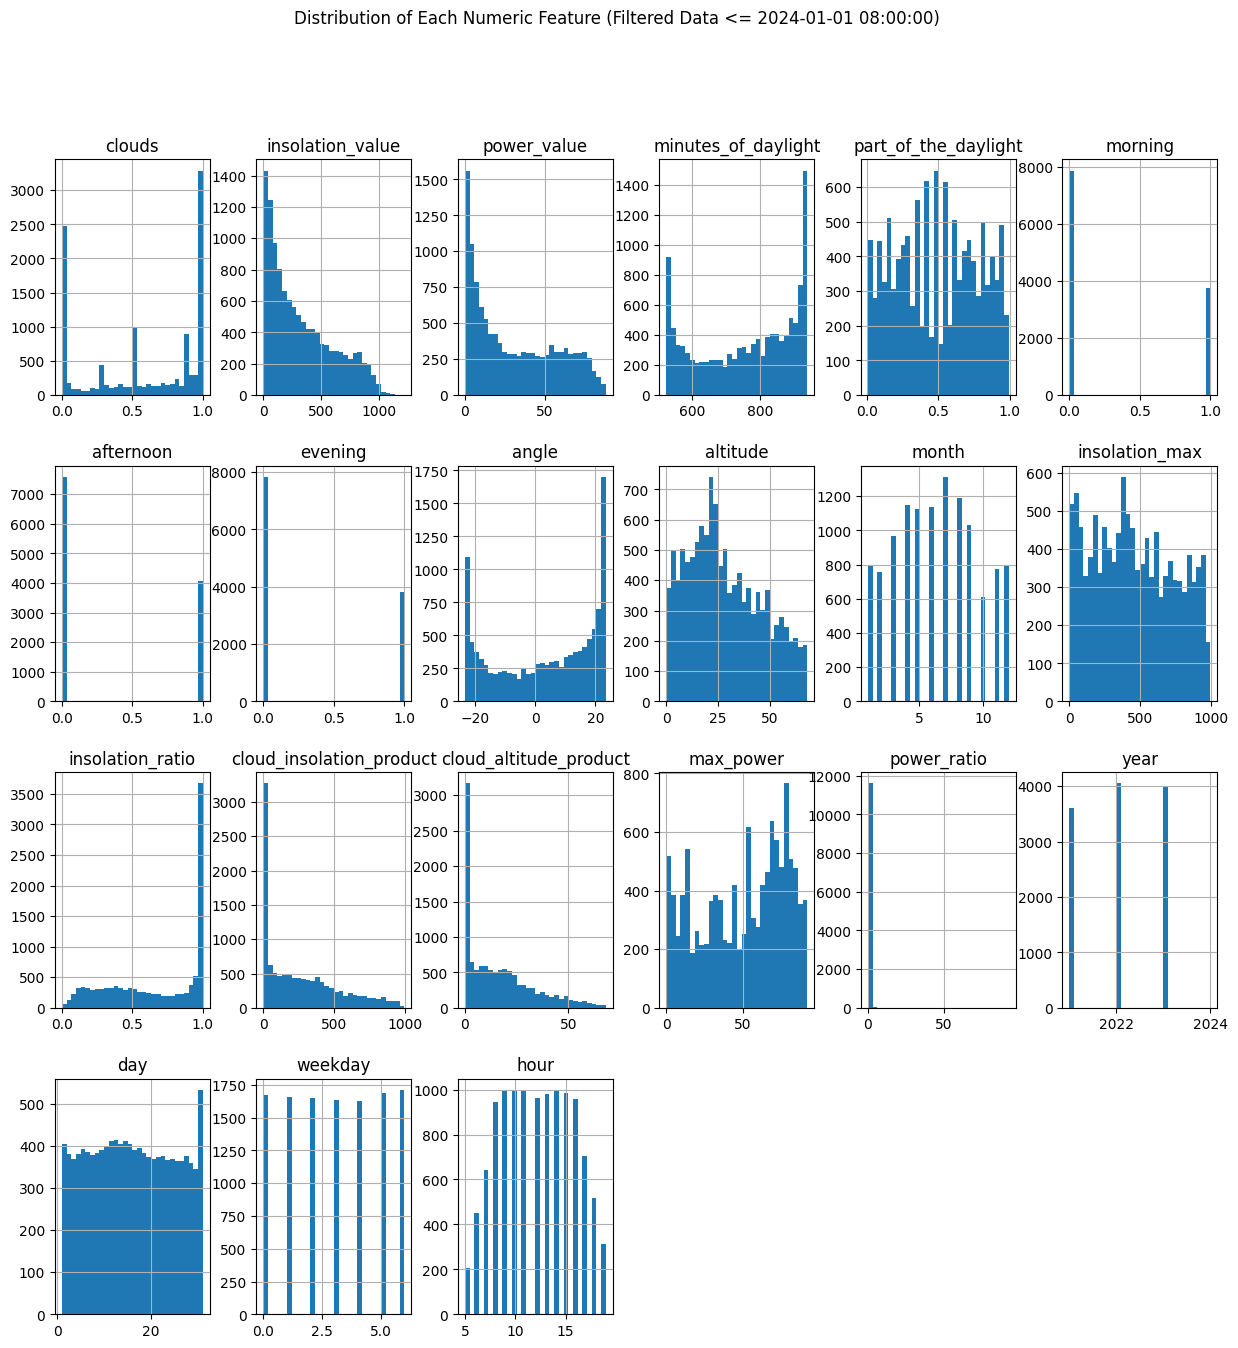

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


# Фильтрация данных для временных меток <= '2024-01-01 08:00:00'
filtered_df = df[df['date_time_clouds'] <= '2024-01-01 08:00:00']

# Выбор только числовых колонок
numeric_df = filtered_df.select_dtypes(include=['number'])

# Построение распределения для каждой колонки
numeric_df.hist(bins=30, figsize=(15, 15), layout=(int(len(numeric_df.columns) ** 0.5), -1))
plt.suptitle("Distribution of Each Numeric Feature (Filtered Data <= 2024-01-01 08:00:00)")
plt.show()


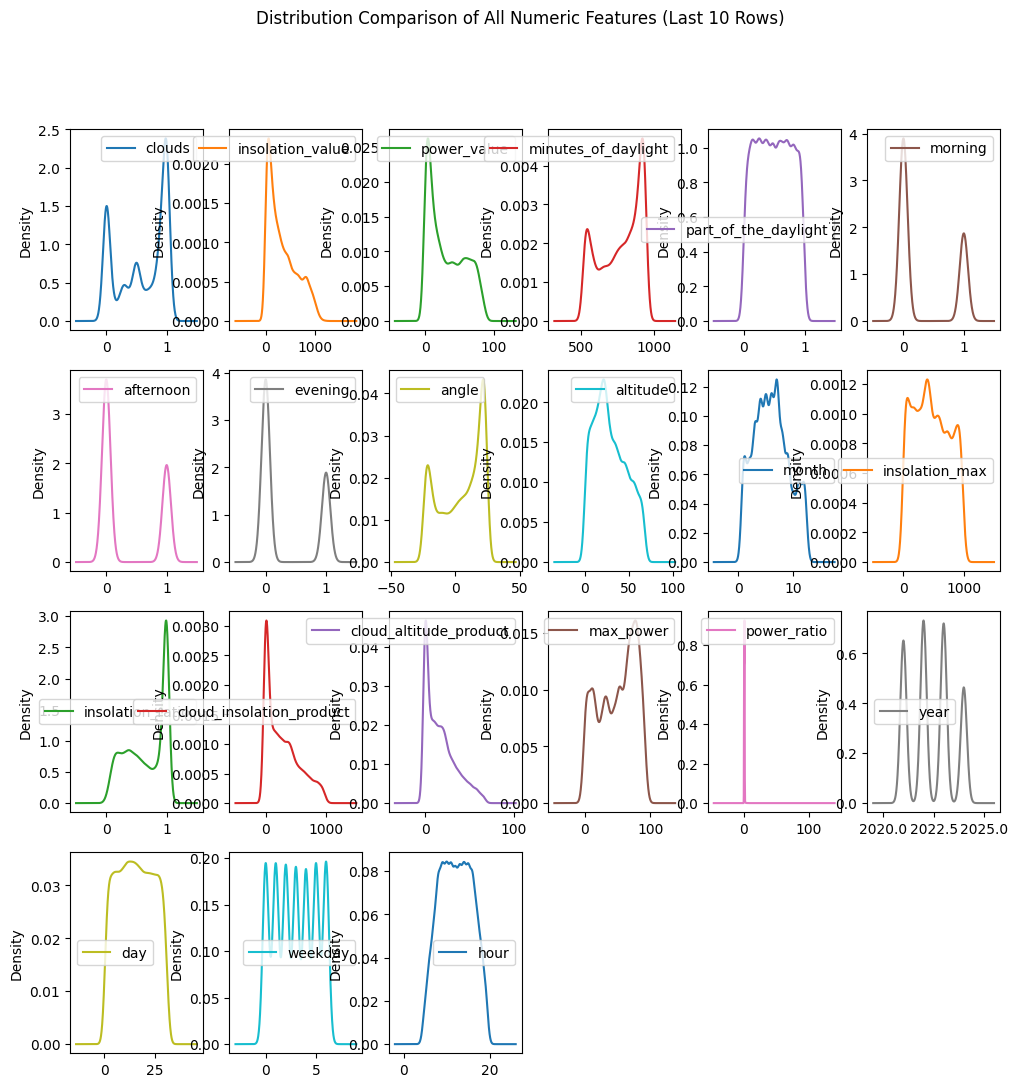

In [9]:
# Построение распределения (гистограмм) для всех числовых признаков для последних 10 строк
numeric_df = df.select_dtypes(include=['number'])

numeric_df.plot(kind='kde', subplots=True, layout=(int(len(numeric_df.columns) ** 0.5), -1), figsize=(12, 12), sharex=False)
plt.suptitle("Distribution Comparison of All Numeric Features (Last 10 Rows)")
plt.show()


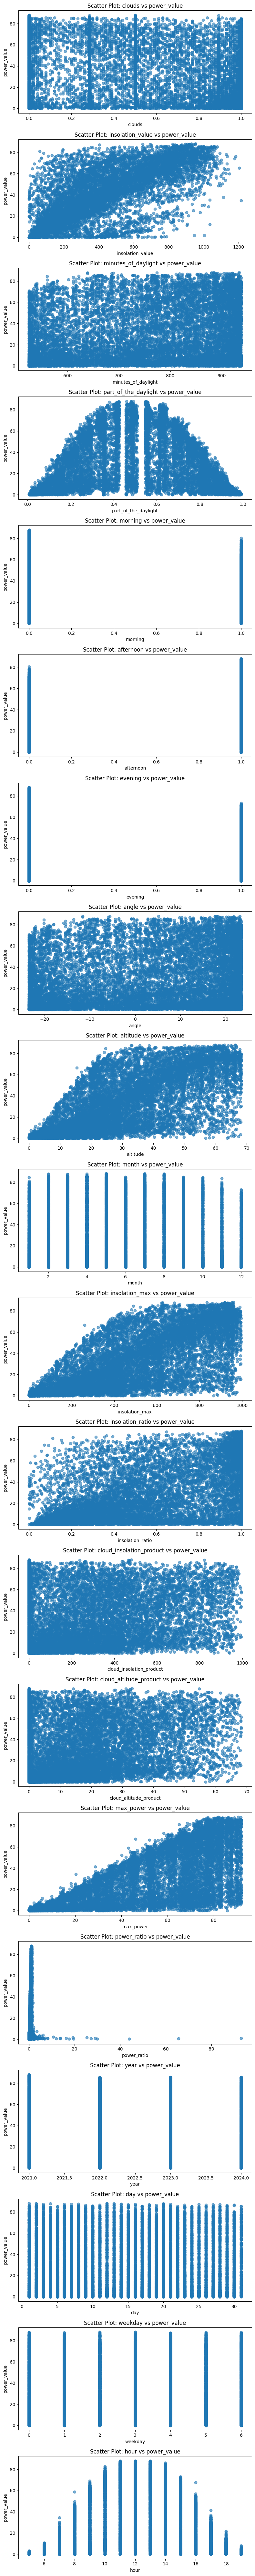

In [10]:
import matplotlib.pyplot as plt

# Построение scatter-графиков между всеми колонками и колонкой 'power_value'
target_column = 'power_value'
features = numeric_df.columns.drop(target_column)

# Создаем сетку scatter-графиков
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4 * len(features)))

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target_column], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_column)
    axes[i].set_title(f'Scatter Plot: {feature} vs {target_column}')

plt.tight_layout()
plt.show()


In [11]:
# Извлечение года из временной метки
df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])
df['year'] = df['date_time_clouds'].dt.year
df['month'] = df['date_time_clouds'].dt.month
df['day'] = df['date_time_clouds'].dt.day
df['weekday'] = df['date_time_clouds'].dt.weekday  # Понедельник=0, Воскресенье=6
df['hour'] = df['date_time_clouds'].dt.hour


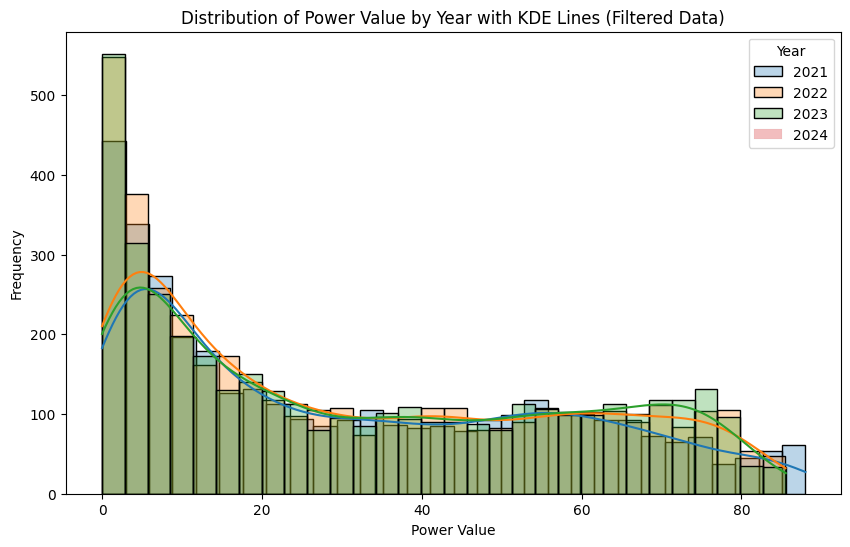

In [12]:
# Фильтрация данных с 2021-01-01 08:00:00 по 2024-01-01 08:00:00
filtered_df = df[(df['date_time_clouds'] >= '2021-01-01 08:00:00') & (df['date_time_clouds'] <= '2024-01-01 08:00:00')]

# Построение гистограммы и KDE для 'power_value' по годам с улучшенными цветами для отфильтрованных данных
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", n_colors=len(filtered_df['year'].unique()))

for i, year in enumerate(filtered_df['year'].unique()):
    sns.histplot(filtered_df[filtered_df['year'] == year]['power_value'], bins=30, kde=True, label=year, alpha=0.3, color=palette[i])

plt.xlabel('Power Value')
plt.ylabel('Frequency')
plt.title('Distribution of Power Value by Year with KDE Lines (Filtered Data)')
plt.legend(title='Year')
plt.show()


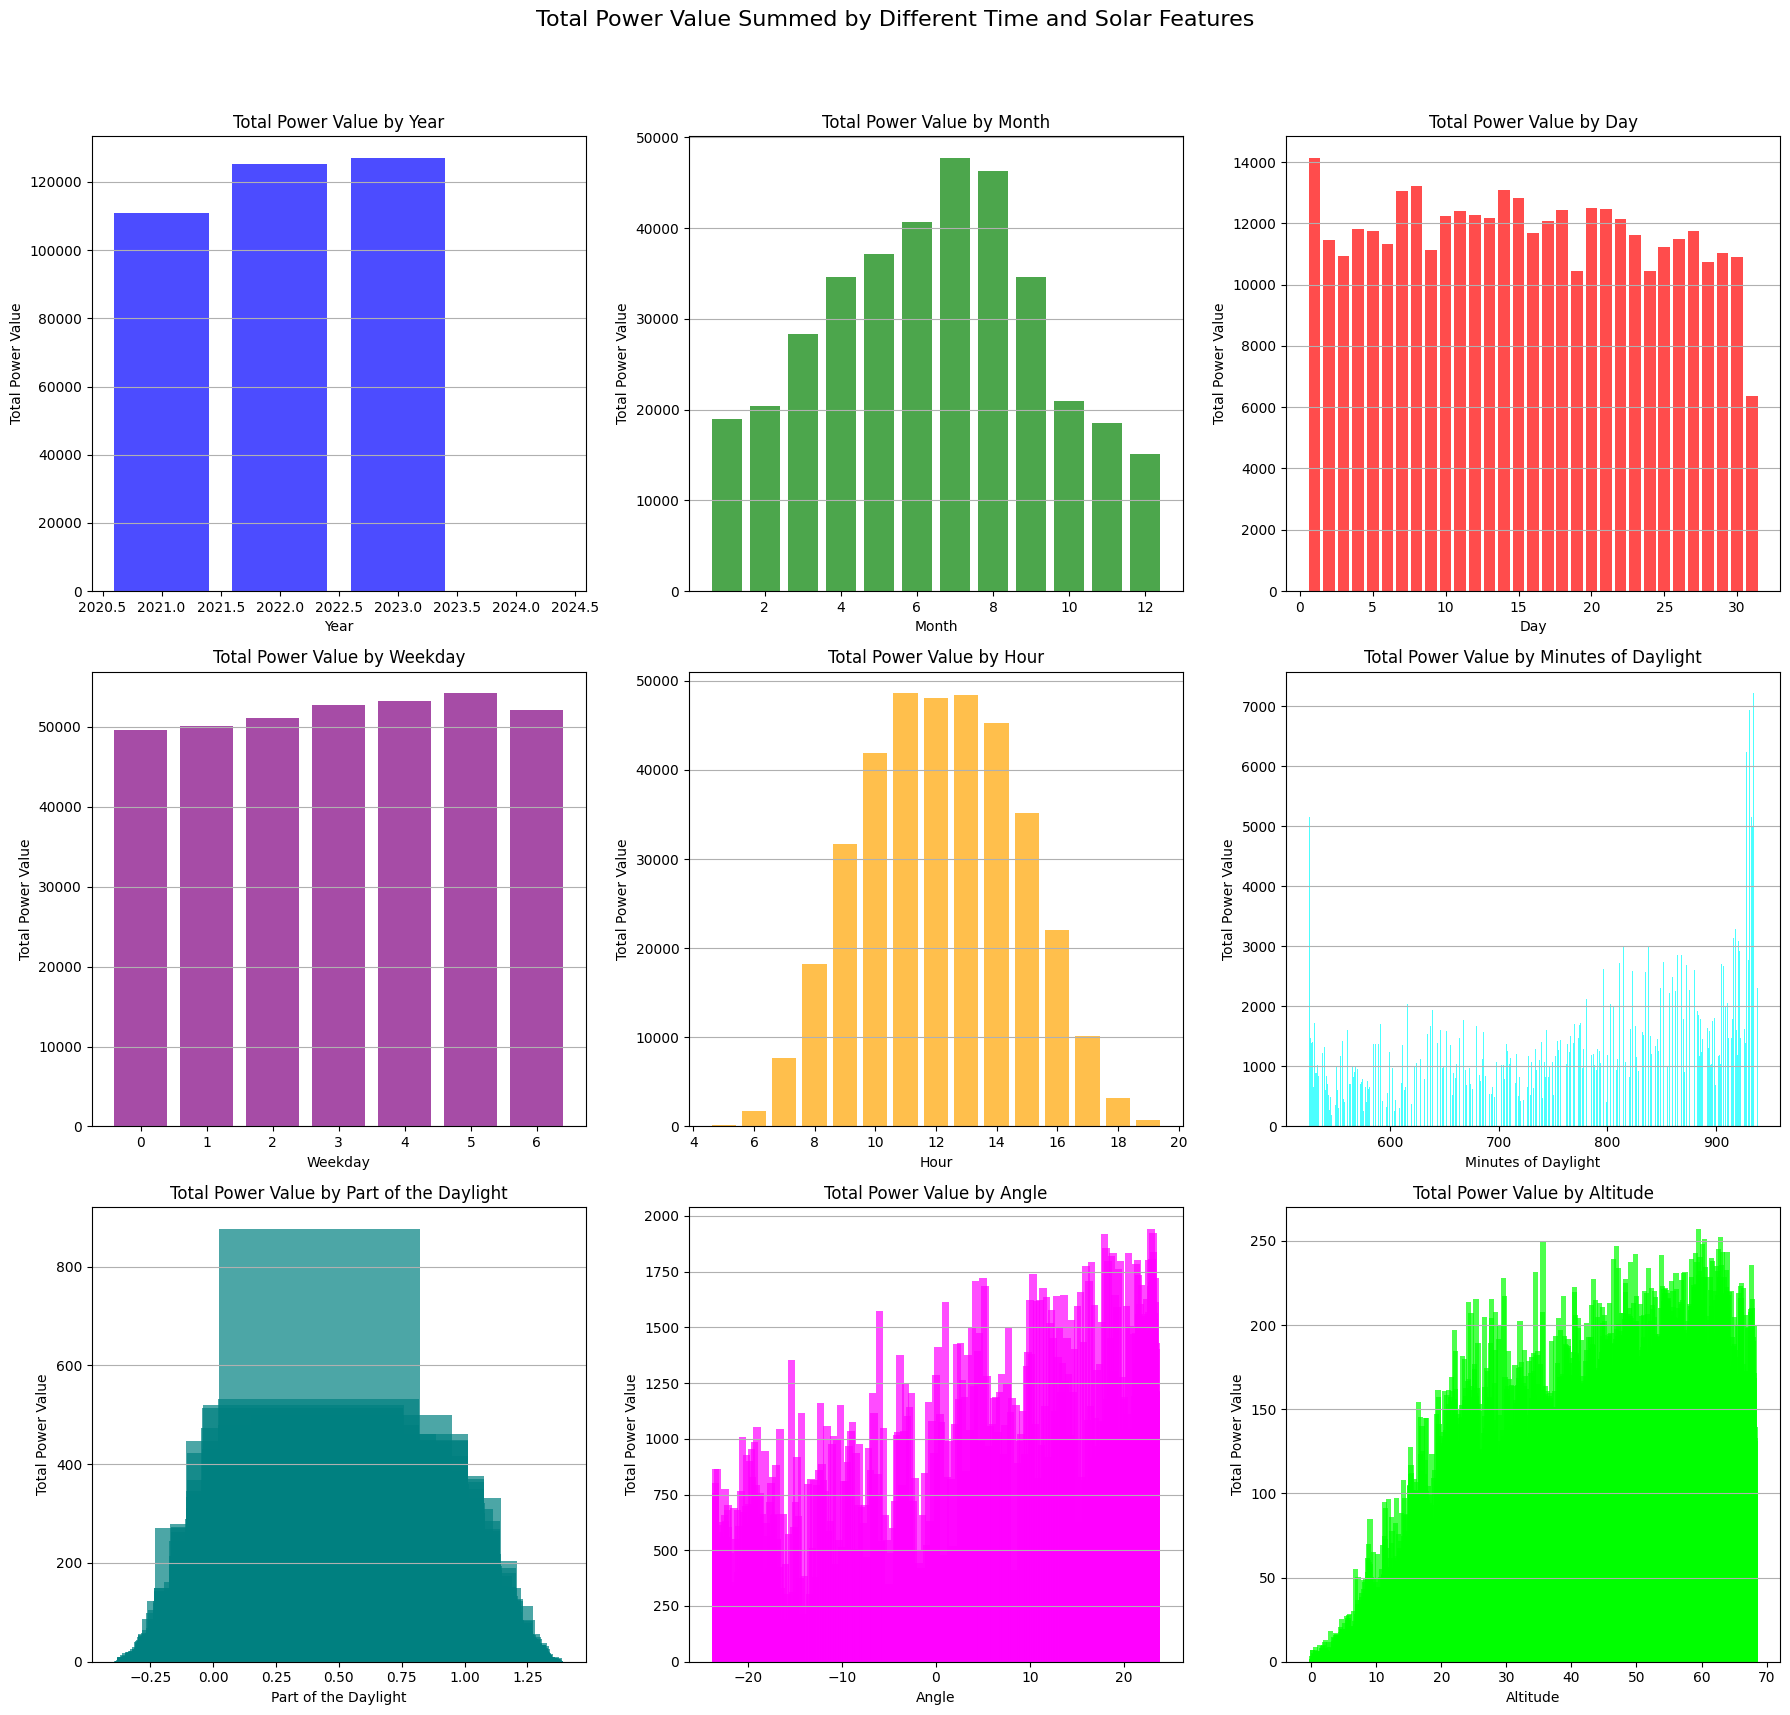

In [13]:
import matplotlib.pyplot as plt
filtered_df_sum = df[df['date_time_clouds'] <= '2024-01-01 08:00:00']

# Суммирование значений 'power_value' по различным временным колонкам
sum_by_year = filtered_df_sum.groupby('year')['power_value'].sum()
sum_by_month = filtered_df_sum.groupby('month')['power_value'].sum()
sum_by_day = filtered_df_sum.groupby('day')['power_value'].sum()
sum_by_weekday = filtered_df_sum.groupby('weekday')['power_value'].sum()
sum_by_hour = filtered_df_sum.groupby('hour')['power_value'].sum()
# Суммирование значений 'power_value' по минутам дневного света
sum_by_minutes_of_daylight = filtered_df_sum.groupby('minutes_of_daylight')['power_value'].sum()
# Суммирование значений 'power_value' по part_of_the_daylight, angle, и altitude
sum_by_part_of_the_daylight = filtered_df_sum.groupby('part_of_the_daylight')['power_value'].sum()
sum_by_angle = filtered_df_sum.groupby('angle')['power_value'].sum()
sum_by_altitude = filtered_df_sum.groupby('altitude')['power_value'].sum()


# Перестройка фигуры для добавления новых графиков
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Total Power Value Summed by Different Time and Solar Features", fontsize=16)

# График для года
axs[0, 0].bar(sum_by_year.index, sum_by_year.values, color='b', alpha=0.7)
axs[0, 0].set_title('Total Power Value by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Total Power Value')
axs[0, 0].grid(axis='y')

# График для месяца
axs[0, 1].bar(sum_by_month.index, sum_by_month.values, color='g', alpha=0.7)
axs[0, 1].set_title('Total Power Value by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Power Value')
axs[0, 1].grid(axis='y')

# График для дня
axs[0, 2].bar(sum_by_day.index, sum_by_day.values, color='r', alpha=0.7)
axs[0, 2].set_title('Total Power Value by Day')
axs[0, 2].set_xlabel('Day')
axs[0, 2].set_ylabel('Total Power Value')
axs[0, 2].grid(axis='y')

# График для дня недели
axs[1, 0].bar(sum_by_weekday.index, sum_by_weekday.values, color='purple', alpha=0.7)
axs[1, 0].set_title('Total Power Value by Weekday')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Total Power Value')
axs[1, 0].grid(axis='y')

# График для часа
axs[1, 1].bar(sum_by_hour.index, sum_by_hour.values, color='orange', alpha=0.7)
axs[1, 1].set_title('Total Power Value by Hour')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Total Power Value')
axs[1, 1].grid(axis='y')

# График для минут дневного света
axs[1, 2].bar(sum_by_minutes_of_daylight.index, sum_by_minutes_of_daylight.values, color='cyan', alpha=0.7)
axs[1, 2].set_title('Total Power Value by Minutes of Daylight')
axs[1, 2].set_xlabel('Minutes of Daylight')
axs[1, 2].set_ylabel('Total Power Value')
axs[1, 2].grid(axis='y')

# График для части дня
axs[2, 0].bar(sum_by_part_of_the_daylight.index, sum_by_part_of_the_daylight.values, color='teal', alpha=0.7)
axs[2, 0].set_title('Total Power Value by Part of the Daylight')
axs[2, 0].set_xlabel('Part of the Daylight')
axs[2, 0].set_ylabel('Total Power Value')
axs[2, 0].grid(axis='y')

# График для угла
axs[2, 1].bar(sum_by_angle.index, sum_by_angle.values, color='magenta', alpha=0.7)
axs[2, 1].set_title('Total Power Value by Angle')
axs[2, 1].set_xlabel('Angle')
axs[2, 1].set_ylabel('Total Power Value')
axs[2, 1].grid(axis='y')

# График для высоты
axs[2, 2].bar(sum_by_altitude.index, sum_by_altitude.values, color='lime', alpha=0.7)
axs[2, 2].set_title('Total Power Value by Altitude')
axs[2, 2].set_xlabel('Altitude')
axs[2, 2].set_ylabel('Total Power Value')
axs[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

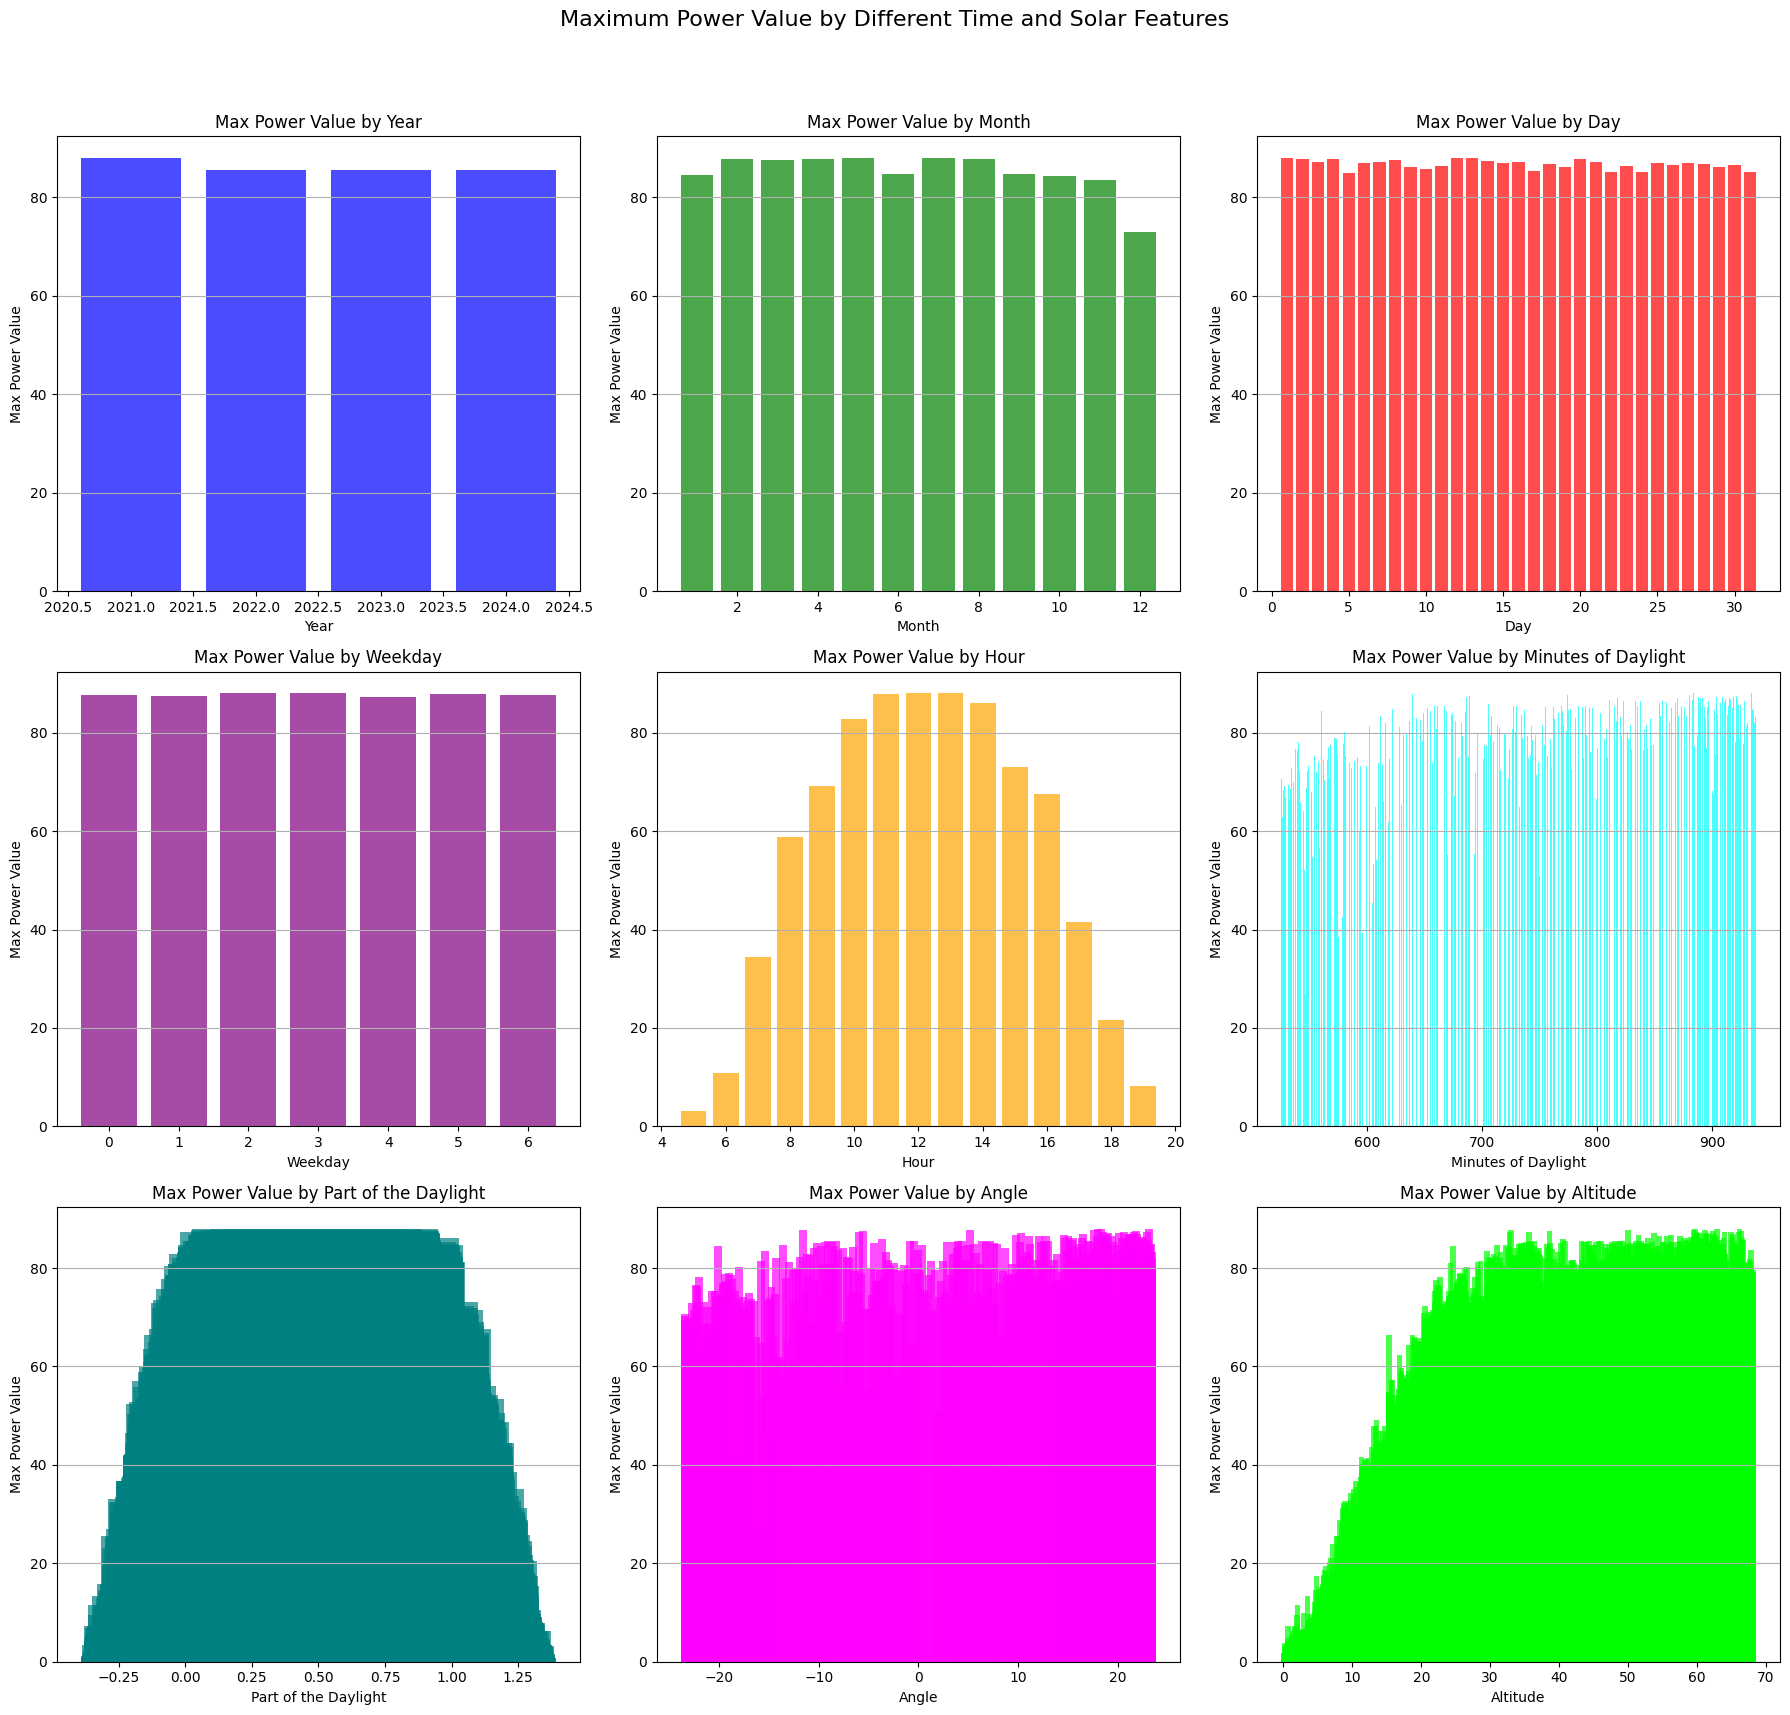

In [14]:
# Максимальные значения 'power_value' по временным и солнечным колонкам
max_by_year = df.groupby('year')['power_value'].max()
max_by_month = df.groupby('month')['power_value'].max()
max_by_day = df.groupby('day')['power_value'].max()
max_by_weekday = df.groupby('weekday')['power_value'].max()
max_by_hour = df.groupby('hour')['power_value'].max()
max_by_minutes_of_daylight = df.groupby('minutes_of_daylight')['power_value'].max()
max_by_part_of_the_daylight = df.groupby('part_of_the_daylight')['power_value'].max()
max_by_angle = df.groupby('angle')['power_value'].max()
max_by_altitude = df.groupby('altitude')['power_value'].max()

# Построение графиков максимальных значений
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Maximum Power Value by Different Time and Solar Features", fontsize=16)

# График для года
axs[0, 0].bar(max_by_year.index, max_by_year.values, color='b', alpha=0.7)
axs[0, 0].set_title('Max Power Value by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Max Power Value')
axs[0, 0].grid(axis='y')

# График для месяца
axs[0, 1].bar(max_by_month.index, max_by_month.values, color='g', alpha=0.7)
axs[0, 1].set_title('Max Power Value by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Max Power Value')
axs[0, 1].grid(axis='y')

# График для дня
axs[0, 2].bar(max_by_day.index, max_by_day.values, color='r', alpha=0.7)
axs[0, 2].set_title('Max Power Value by Day')
axs[0, 2].set_xlabel('Day')
axs[0, 2].set_ylabel('Max Power Value')
axs[0, 2].grid(axis='y')

# График для дня недели
axs[1, 0].bar(max_by_weekday.index, max_by_weekday.values, color='purple', alpha=0.7)
axs[1, 0].set_title('Max Power Value by Weekday')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Max Power Value')
axs[1, 0].grid(axis='y')

# График для часа
axs[1, 1].bar(max_by_hour.index, max_by_hour.values, color='orange', alpha=0.7)
axs[1, 1].set_title('Max Power Value by Hour')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Max Power Value')
axs[1, 1].grid(axis='y')

# График для минут дневного света
axs[1, 2].bar(max_by_minutes_of_daylight.index, max_by_minutes_of_daylight.values, color='cyan', alpha=0.7)
axs[1, 2].set_title('Max Power Value by Minutes of Daylight')
axs[1, 2].set_xlabel('Minutes of Daylight')
axs[1, 2].set_ylabel('Max Power Value')
axs[1, 2].grid(axis='y')

# График для части дня
axs[2, 0].bar(max_by_part_of_the_daylight.index, max_by_part_of_the_daylight.values, color='teal', alpha=0.7)
axs[2, 0].set_title('Max Power Value by Part of the Daylight')
axs[2, 0].set_xlabel('Part of the Daylight')
axs[2, 0].set_ylabel('Max Power Value')
axs[2, 0].grid(axis='y')

# График для угла
axs[2, 1].bar(max_by_angle.index, max_by_angle.values, color='magenta', alpha=0.7)
axs[2, 1].set_title('Max Power Value by Angle')
axs[2, 1].set_xlabel('Angle')
axs[2, 1].set_ylabel('Max Power Value')
axs[2, 1].grid(axis='y')

# График для высоты
axs[2, 2].bar(max_by_altitude.index, max_by_altitude.values, color='lime', alpha=0.7)
axs[2, 2].set_title('Max Power Value by Altitude')
axs[2, 2].set_xlabel('Altitude')
axs[2, 2].set_ylabel('Max Power Value')
axs[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


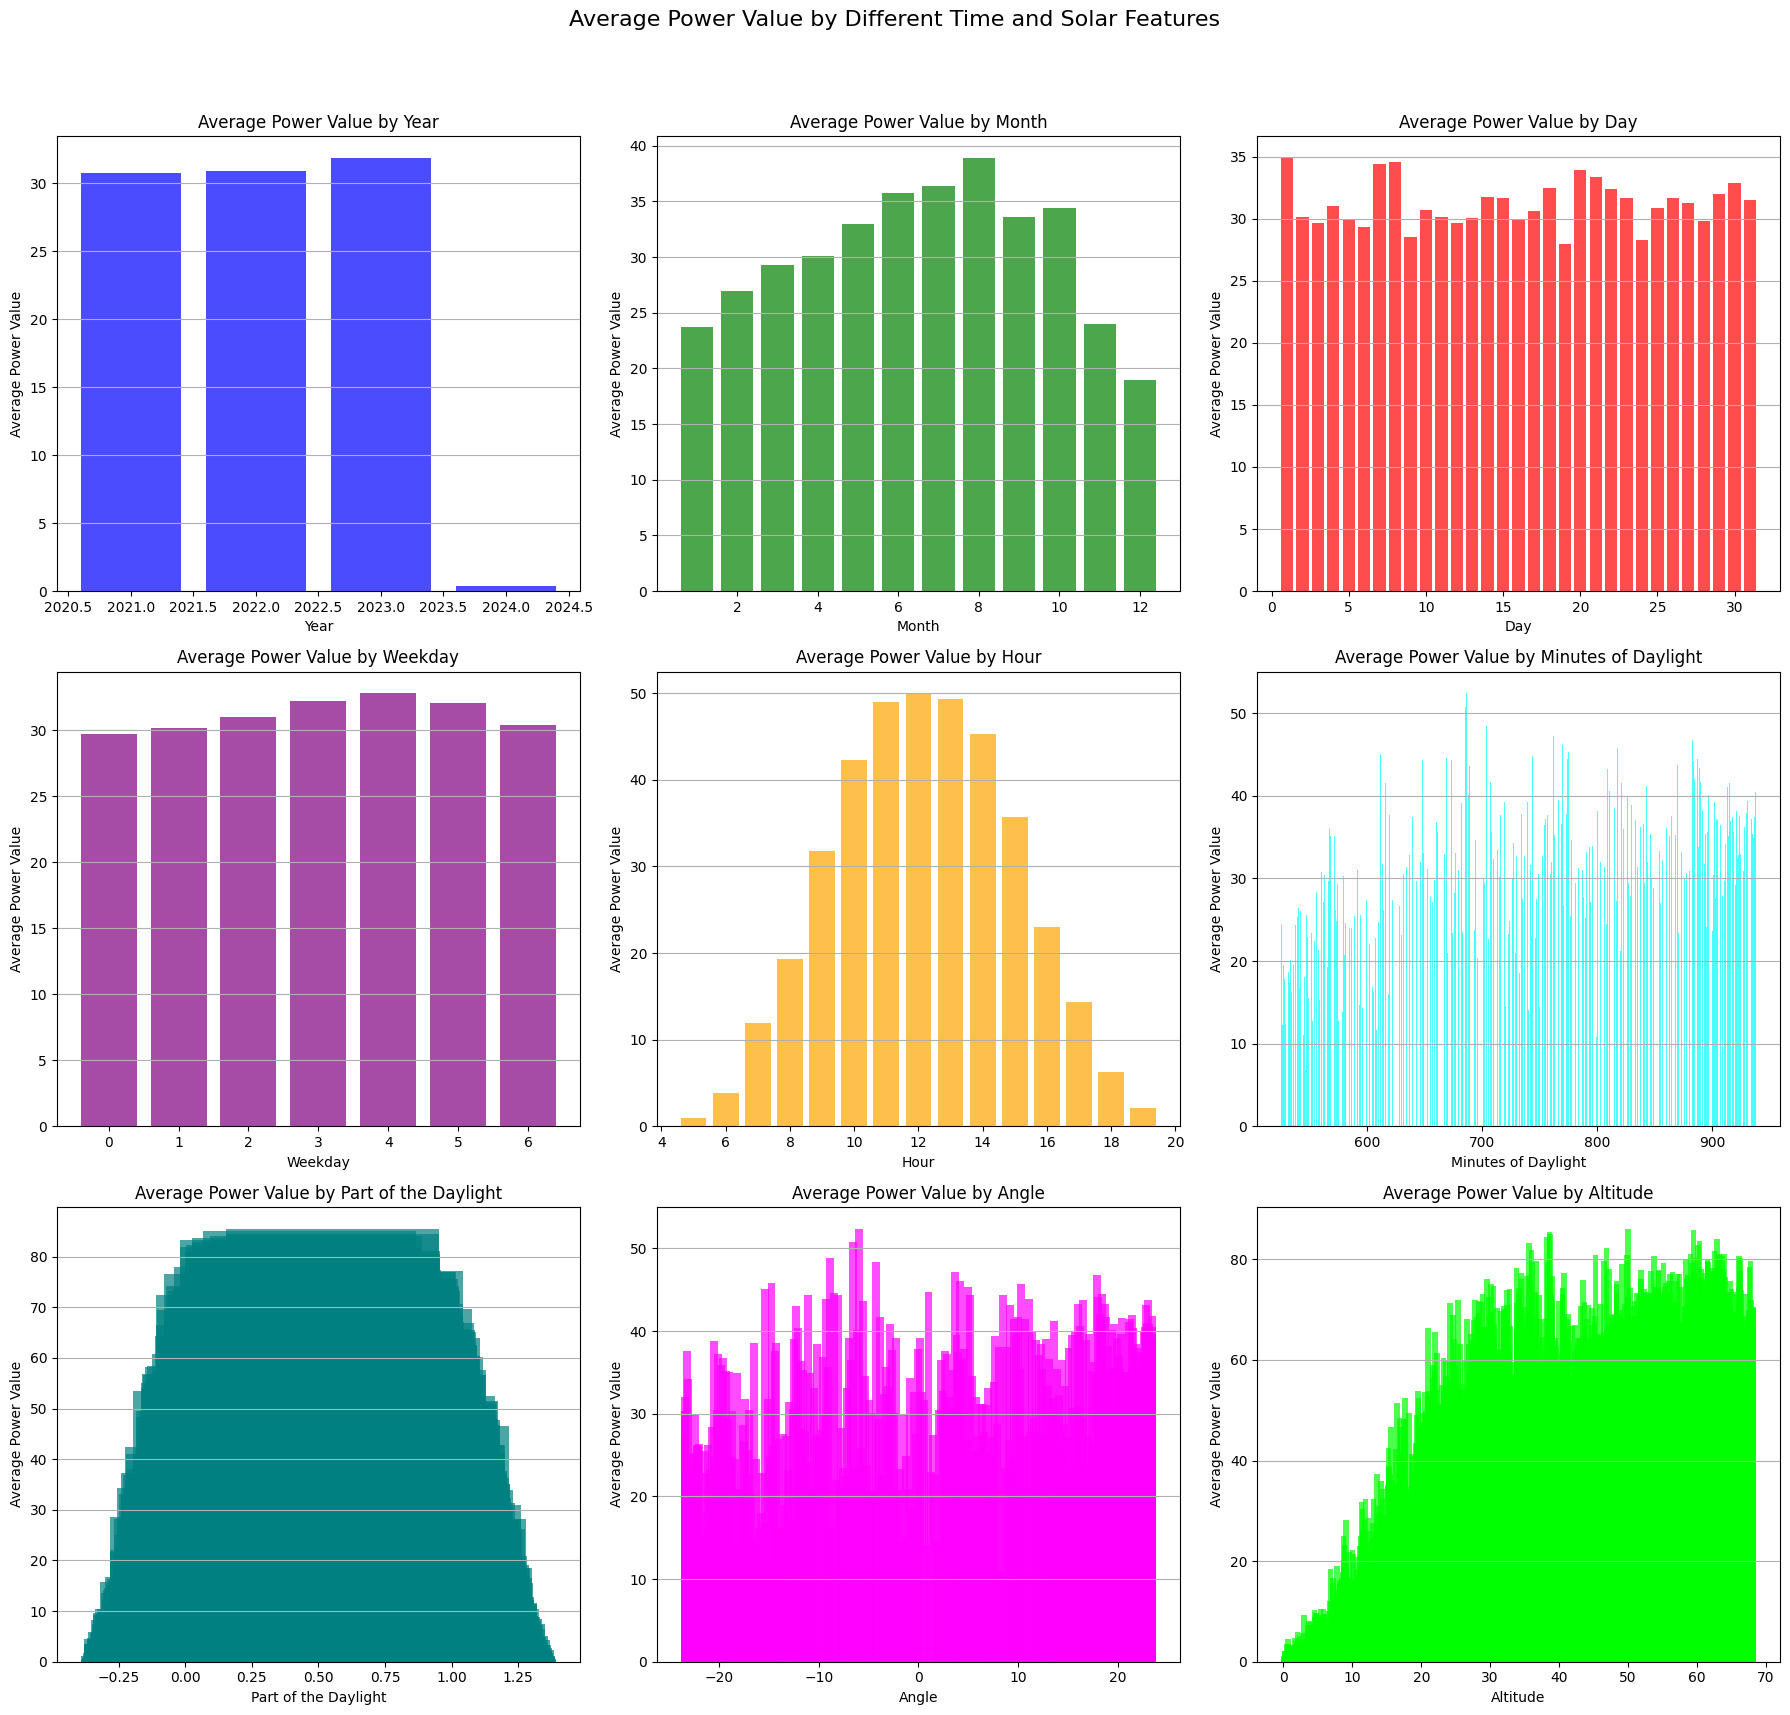

In [15]:
import matplotlib.pyplot as plt

# Фильтрация данных для временных меток <= '2024-01-01 08:00:00'
filtered_df_mean = df[df['date_time_clouds'] <= '2024-01-01 08:00:00']

# Вычисление среднего значения 'power_value' по различным временным колонкам
mean_by_year = filtered_df_mean.groupby('year')['power_value'].mean()
mean_by_month = filtered_df_mean.groupby('month')['power_value'].mean()
mean_by_day = filtered_df_mean.groupby('day')['power_value'].mean()
mean_by_weekday = filtered_df_mean.groupby('weekday')['power_value'].mean()
mean_by_hour = filtered_df_mean.groupby('hour')['power_value'].mean()
mean_by_minutes_of_daylight = filtered_df_mean.groupby('minutes_of_daylight')['power_value'].mean()
mean_by_part_of_the_daylight = filtered_df_mean.groupby('part_of_the_daylight')['power_value'].mean()
mean_by_angle = filtered_df_mean.groupby('angle')['power_value'].mean()
mean_by_altitude = filtered_df_mean.groupby('altitude')['power_value'].mean()

# Перестройка фигуры для добавления новых графиков
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Average Power Value by Different Time and Solar Features", fontsize=16)

# График для года
axs[0, 0].bar(mean_by_year.index, mean_by_year.values, color='b', alpha=0.7)
axs[0, 0].set_title('Average Power Value by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Power Value')
axs[0, 0].grid(axis='y')

# График для месяца
axs[0, 1].bar(mean_by_month.index, mean_by_month.values, color='g', alpha=0.7)
axs[0, 1].set_title('Average Power Value by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Average Power Value')
axs[0, 1].grid(axis='y')

# График для дня
axs[0, 2].bar(mean_by_day.index, mean_by_day.values, color='r', alpha=0.7)
axs[0, 2].set_title('Average Power Value by Day')
axs[0, 2].set_xlabel('Day')
axs[0, 2].set_ylabel('Average Power Value')
axs[0, 2].grid(axis='y')

# График для дня недели
axs[1, 0].bar(mean_by_weekday.index, mean_by_weekday.values, color='purple', alpha=0.7)
axs[1, 0].set_title('Average Power Value by Weekday')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Average Power Value')
axs[1, 0].grid(axis='y')

# График для часа
axs[1, 1].bar(mean_by_hour.index, mean_by_hour.values, color='orange', alpha=0.7)
axs[1, 1].set_title('Average Power Value by Hour')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Average Power Value')
axs[1, 1].grid(axis='y')

# График для минут дневного света
axs[1, 2].bar(mean_by_minutes_of_daylight.index, mean_by_minutes_of_daylight.values, color='cyan', alpha=0.7)
axs[1, 2].set_title('Average Power Value by Minutes of Daylight')
axs[1, 2].set_xlabel('Minutes of Daylight')
axs[1, 2].set_ylabel('Average Power Value')
axs[1, 2].grid(axis='y')

# График для части дня
axs[2, 0].bar(mean_by_part_of_the_daylight.index, mean_by_part_of_the_daylight.values, color='teal', alpha=0.7)
axs[2, 0].set_title('Average Power Value by Part of the Daylight')
axs[2, 0].set_xlabel('Part of the Daylight')
axs[2, 0].set_ylabel('Average Power Value')
axs[2, 0].grid(axis='y')

# График для угла
axs[2, 1].bar(mean_by_angle.index, mean_by_angle.values, color='magenta', alpha=0.7)
axs[2, 1].set_title('Average Power Value by Angle')
axs[2, 1].set_xlabel('Angle')
axs[2, 1].set_ylabel('Average Power Value')
axs[2, 1].grid(axis='y')

# График для высоты
axs[2, 2].bar(mean_by_altitude.index, mean_by_altitude.values, color='lime', alpha=0.7)
axs[2, 2].set_title('Average Power Value by Altitude')
axs[2, 2].set_xlabel('Altitude')
axs[2, 2].set_ylabel('Average Power Value')
axs[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


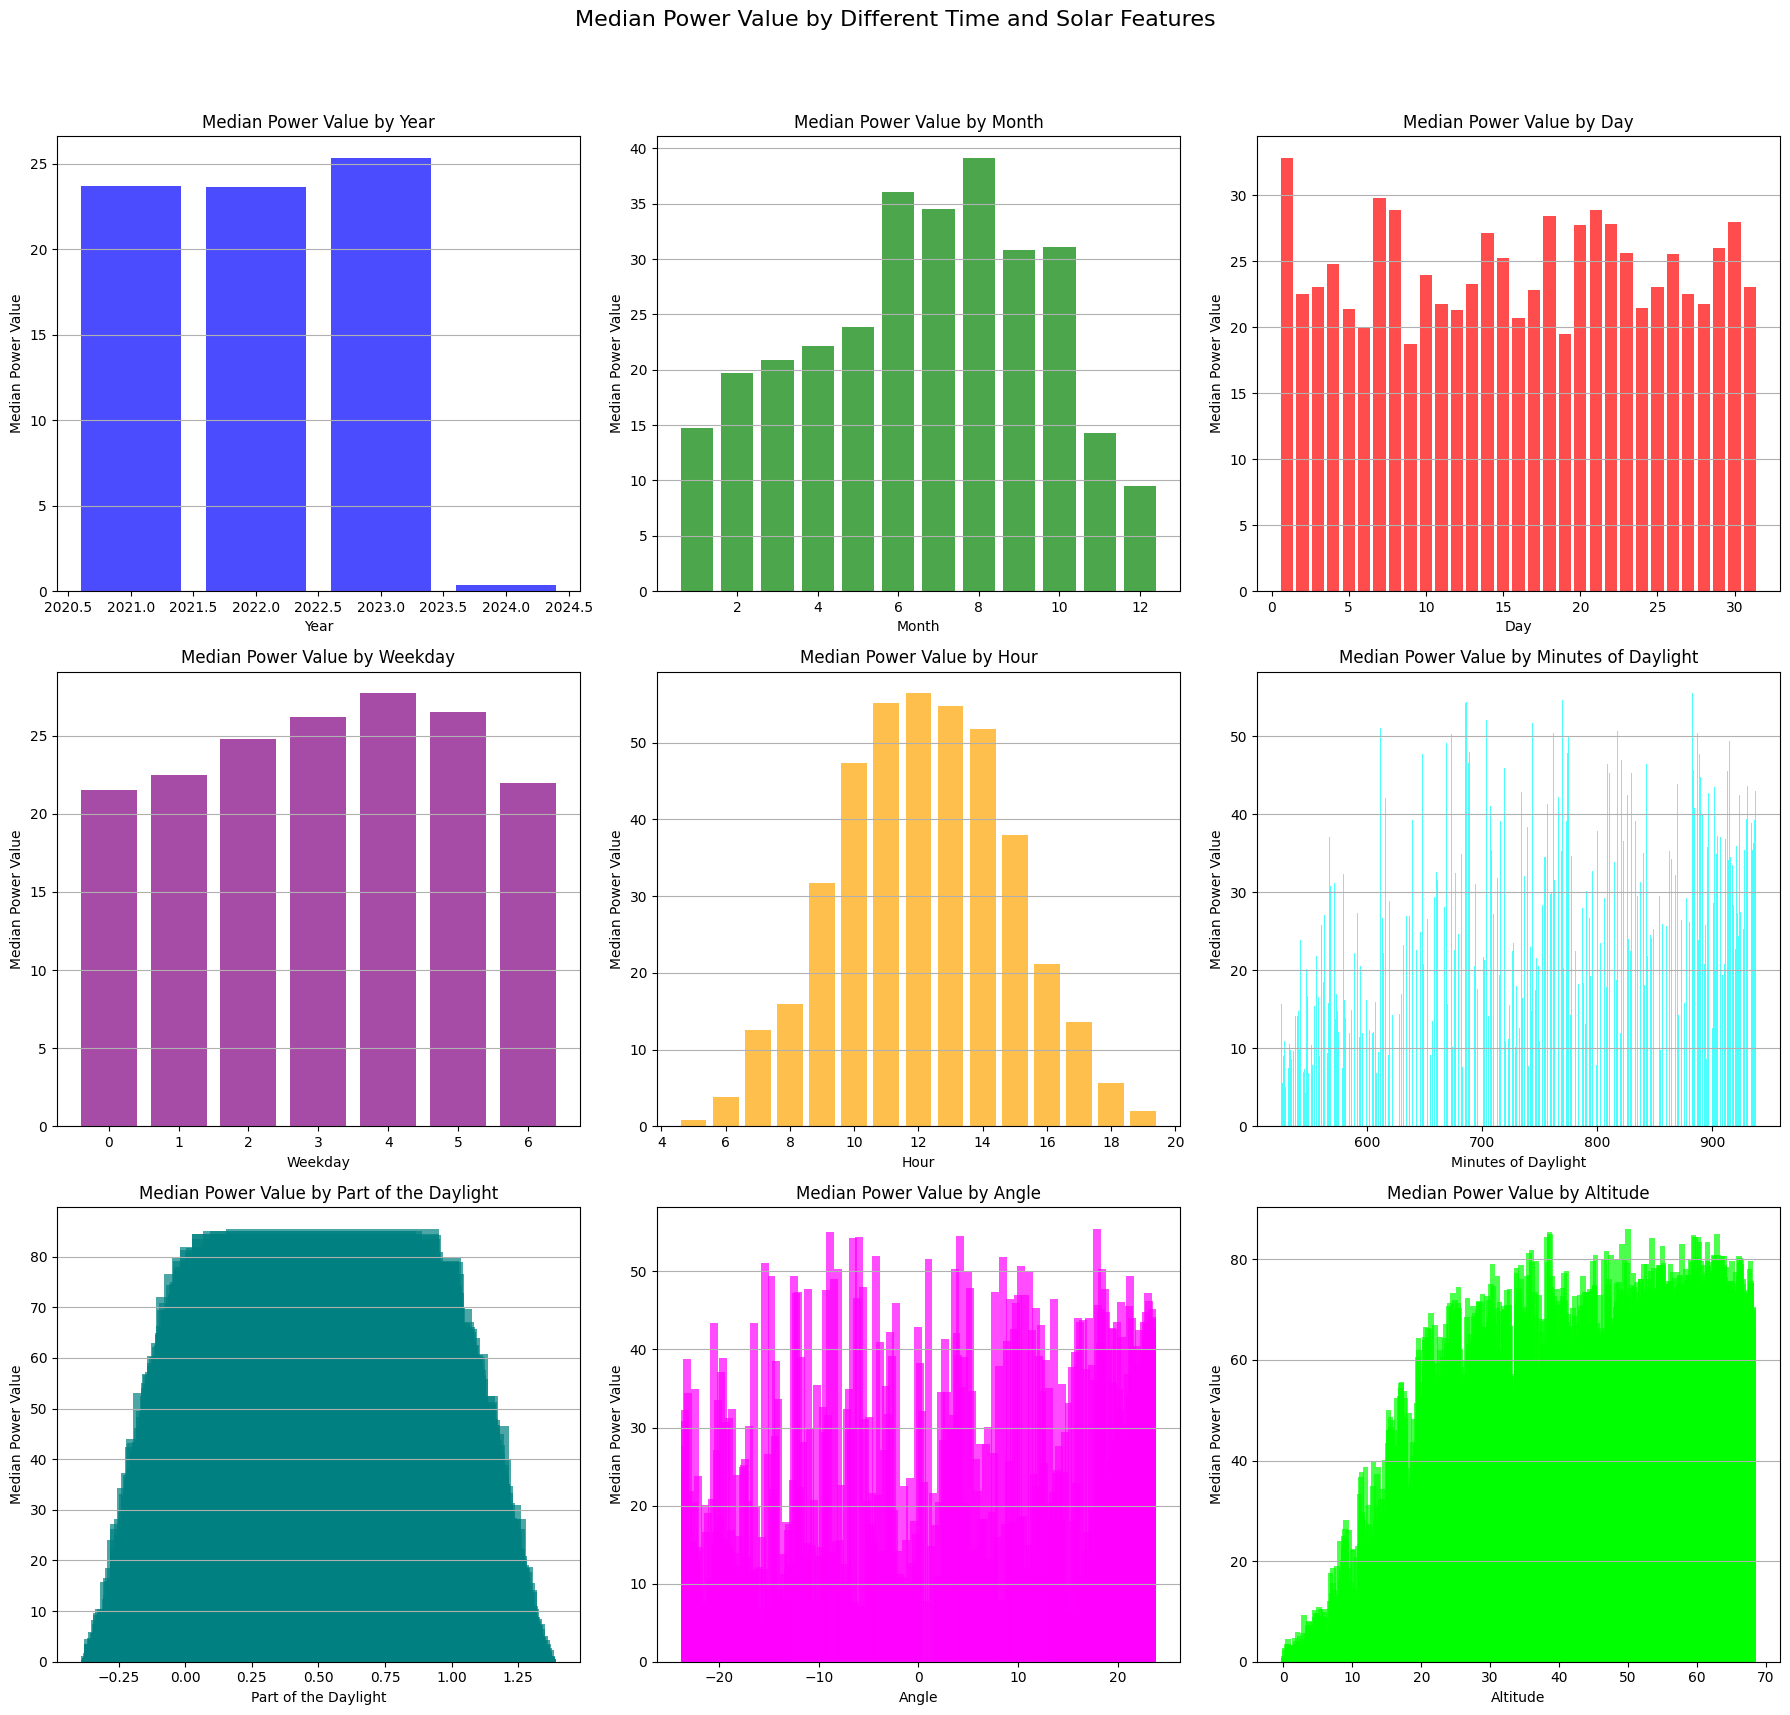

In [16]:
import matplotlib.pyplot as plt

# Фильтрация данных для временных меток <= '2024-01-01 08:00:00'
filtered_df_median = df[df['date_time_clouds'] <= '2024-01-01 08:00:00']

# Вычисление медианы 'power_value' по различным временным колонкам
median_by_year = filtered_df_median.groupby('year')['power_value'].median()
median_by_month = filtered_df_median.groupby('month')['power_value'].median()
median_by_day = filtered_df_median.groupby('day')['power_value'].median()
median_by_weekday = filtered_df_median.groupby('weekday')['power_value'].median()
median_by_hour = filtered_df_median.groupby('hour')['power_value'].median()
median_by_minutes_of_daylight = filtered_df_median.groupby('minutes_of_daylight')['power_value'].median()
median_by_part_of_the_daylight = filtered_df_median.groupby('part_of_the_daylight')['power_value'].median()
median_by_angle = filtered_df_median.groupby('angle')['power_value'].median()
median_by_altitude = filtered_df_median.groupby('altitude')['power_value'].median()

# Перестройка фигуры для добавления новых графиков
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Median Power Value by Different Time and Solar Features", fontsize=16)

# График для года
axs[0, 0].bar(median_by_year.index, median_by_year.values, color='b', alpha=0.7)
axs[0, 0].set_title('Median Power Value by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Median Power Value')
axs[0, 0].grid(axis='y')

# График для месяца
axs[0, 1].bar(median_by_month.index, median_by_month.values, color='g', alpha=0.7)
axs[0, 1].set_title('Median Power Value by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Median Power Value')
axs[0, 1].grid(axis='y')

# График для дня
axs[0, 2].bar(median_by_day.index, median_by_day.values, color='r', alpha=0.7)
axs[0, 2].set_title('Median Power Value by Day')
axs[0, 2].set_xlabel('Day')
axs[0, 2].set_ylabel('Median Power Value')
axs[0, 2].grid(axis='y')

# График для дня недели
axs[1, 0].bar(median_by_weekday.index, median_by_weekday.values, color='purple', alpha=0.7)
axs[1, 0].set_title('Median Power Value by Weekday')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Median Power Value')
axs[1, 0].grid(axis='y')

# График для часа
axs[1, 1].bar(median_by_hour.index, median_by_hour.values, color='orange', alpha=0.7)
axs[1, 1].set_title('Median Power Value by Hour')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Median Power Value')
axs[1, 1].grid(axis='y')

# График для минут дневного света
axs[1, 2].bar(median_by_minutes_of_daylight.index, median_by_minutes_of_daylight.values, color='cyan', alpha=0.7)
axs[1, 2].set_title('Median Power Value by Minutes of Daylight')
axs[1, 2].set_xlabel('Minutes of Daylight')
axs[1, 2].set_ylabel('Median Power Value')
axs[1, 2].grid(axis='y')

# График для части дня
axs[2, 0].bar(median_by_part_of_the_daylight.index, median_by_part_of_the_daylight.values, color='teal', alpha=0.7)
axs[2, 0].set_title('Median Power Value by Part of the Daylight')
axs[2, 0].set_xlabel('Part of the Daylight')
axs[2, 0].set_ylabel('Median Power Value')
axs[2, 0].grid(axis='y')

# График для угла
axs[2, 1].bar(median_by_angle.index, median_by_angle.values, color='magenta', alpha=0.7)
axs[2, 1].set_title('Median Power Value by Angle')
axs[2, 1].set_xlabel('Angle')
axs[2, 1].set_ylabel('Median Power Value')
axs[2, 1].grid(axis='y')

# График для высоты
axs[2, 2].bar(median_by_altitude.index, median_by_altitude.values, color='lime', alpha=0.7)
axs[2, 2].set_title('Median Power Value by Altitude')
axs[2, 2].set_xlabel('Altitude')
axs[2, 2].set_ylabel('Median Power Value')
axs[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


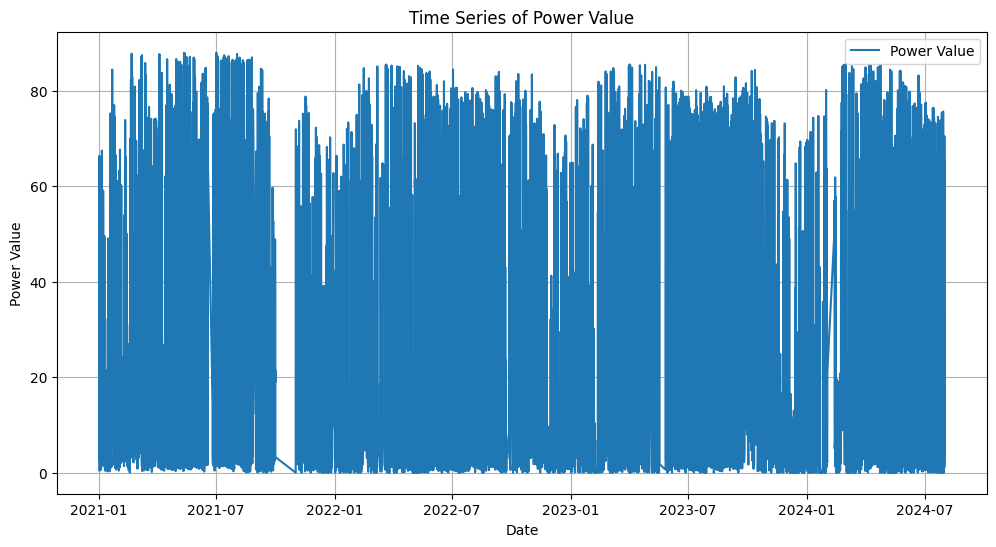

In [17]:
# Построение временного ряда
# Установка индекса по времени
# df.set_index('date_time_clouds', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df['date_time_clouds'], df['power_value'], label='Power Value')
plt.xlabel('Date')
plt.ylabel('Power Value')
plt.title('Time Series of Power Value')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Попытка определить частоту временного ряда
frequency = pd.infer_freq(df['date_time_clouds'])

# Проверка результата
if frequency is None:
    print("Временной ряд содержит пропуски.")
else:
    print(f"Частота временного ряда: {frequency}. Пропусков нет.")

Временной ряд содержит пропуски.


In [19]:

# Группировка и создание уникальных дат
unique_dates = df.groupby(['year', 'month', 'day']).size().reset_index()[['year', 'month', 'day']]

# Создание одной колонки с форматом 'YYYY-MM-DD'
unique_dates['unique_date'] = pd.to_datetime(unique_dates[['year', 'month', 'day']])

# Оставляем только колонку с уникальными датами
unique_dates_df = unique_dates[['unique_date']]

import pandas as pd

# Создание полного временного диапазона на основе минимальной и максимальной даты
full_date_range = pd.date_range(start=unique_dates_df['unique_date'].min(), end=unique_dates_df['unique_date'].max(), freq='D')

# Поиск пропущенных дат
missing_dates = full_date_range.difference(unique_dates_df['unique_date'])

# Вывод пропущенных дат
print(f"Количество пропущенных дат: {len(missing_dates)}")
print("Пропущенные даты:")
print(missing_dates)

# Общее количество дат в полном диапазоне
total_dates = len(full_date_range)

# Количество пропущенных дат
missing_dates_count = len(missing_dates)

# Процент пропущенных дат
missing_percentage = (missing_dates_count / total_dates) * 100

print(f"Процент пропущенных дат: {missing_percentage:.2f}%")


import pandas as pd

# Создание DataFrame с полным диапазоном дат
full_date_range = pd.date_range(start=unique_dates_df['unique_date'].min(), end=unique_dates_df['unique_date'].max(), freq='D')
full_dates_df = pd.DataFrame(full_date_range, columns=['date'])

# Пометка пропущенных дат
full_dates_df['is_missing'] = ~full_dates_df['date'].isin(unique_dates_df['unique_date'])

# Добавление года
full_dates_df['year'] = full_dates_df['date'].dt.year

# Группировка по году и расчет процента пропущенных дат
missing_percentage_by_year = full_dates_df.groupby('year')['is_missing'].mean() * 100

# Вывод результатов
print("Процент пропущенных дат по годам:")
print(missing_percentage_by_year)


Количество пропущенных дат: 82
Пропущенные даты:
DatetimeIndex(['2021-02-06', '2021-02-07', '2021-03-31', '2021-06-19',
               '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-07-30', '2021-07-31', '2021-08-28',
               '2021-08-29', '2021-08-30', '2021-10-01', '2021-10-02',
               '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-12-28', '2021-12-30', '2022-01-28',
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-16',
               '2022-03-17',

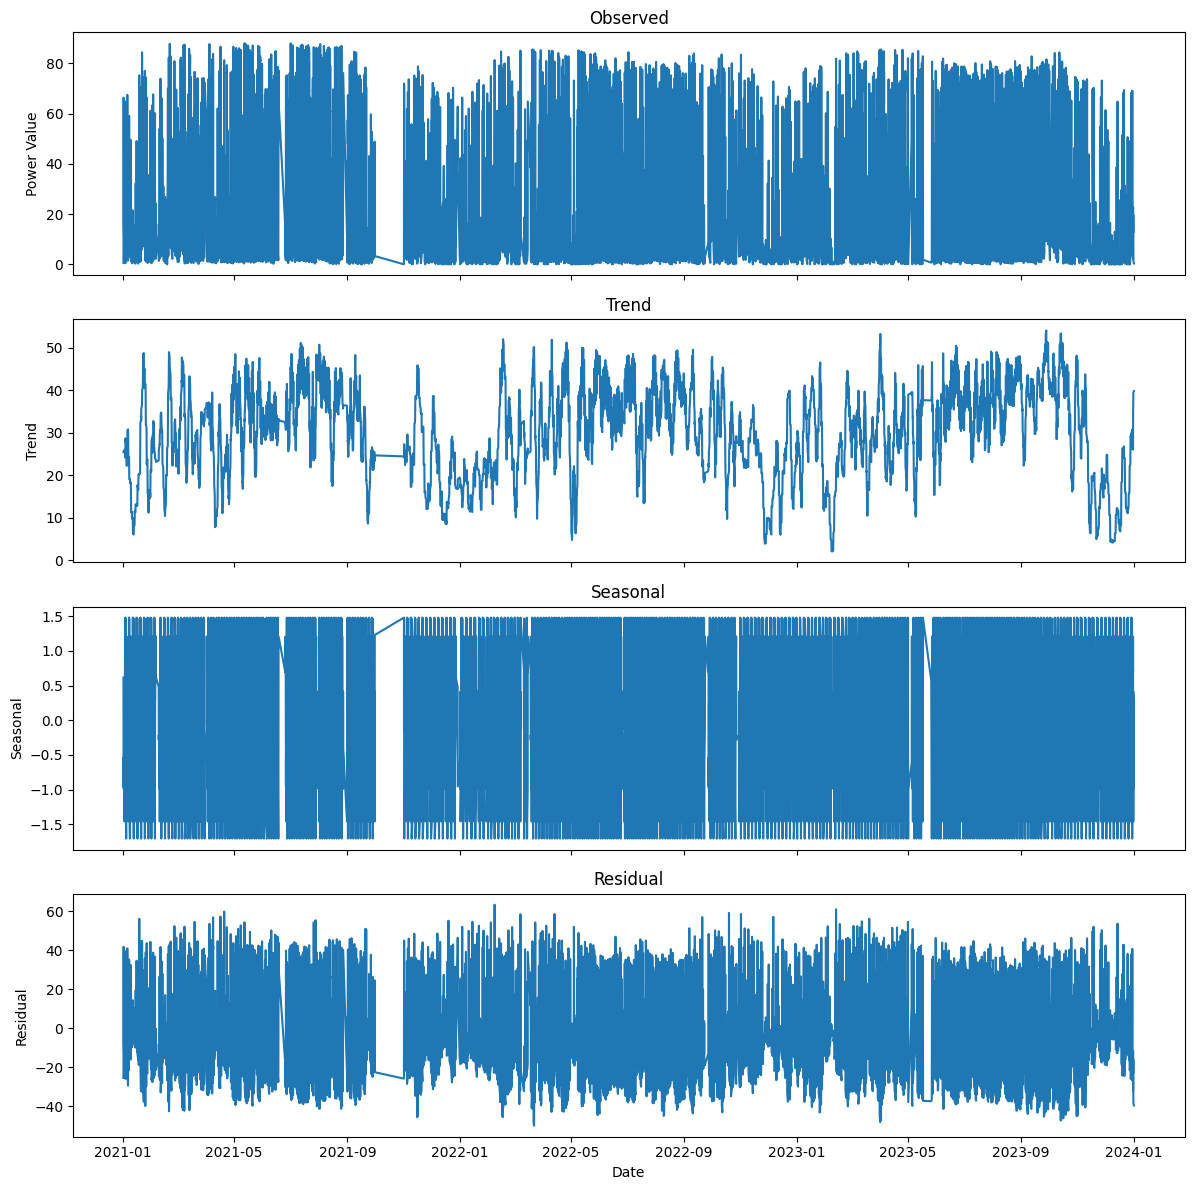

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Преобразование колонки 'date_time_clouds' в формат даты и времени, если это еще не сделано
df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])

# Фильтрация данных до '2024-01-01 08:00:00'
filtered_df = df[df['date_time_clouds'] <= '2024-01-01 08:00:00']

# Убедимся, что данные отсортированы по 'date_time_clouds'
filtered_df = filtered_df.sort_values('date_time_clouds')

# Выполнение декомпозиции временного ряда
# Укажите период сезонности. Например, если данные почасовые и сезонность ожидается по дням, период может быть 24 или 36.
decomposition = seasonal_decompose(filtered_df['power_value'], model='additive', period=36, extrapolate_trend='freq')

# Построение графиков компонентов декомпозиции
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
ax1.plot(filtered_df['date_time_clouds'], decomposition.observed)
ax1.set_title('Observed')
ax1.set_ylabel('Power Value')

ax2.plot(filtered_df['date_time_clouds'], decomposition.trend)
ax2.set_title('Trend')
ax2.set_ylabel('Trend')

ax3.plot(filtered_df['date_time_clouds'], decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.set_ylabel('Seasonal')

ax4.plot(filtered_df['date_time_clouds'], decomposition.resid)
ax4.set_title('Residual')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


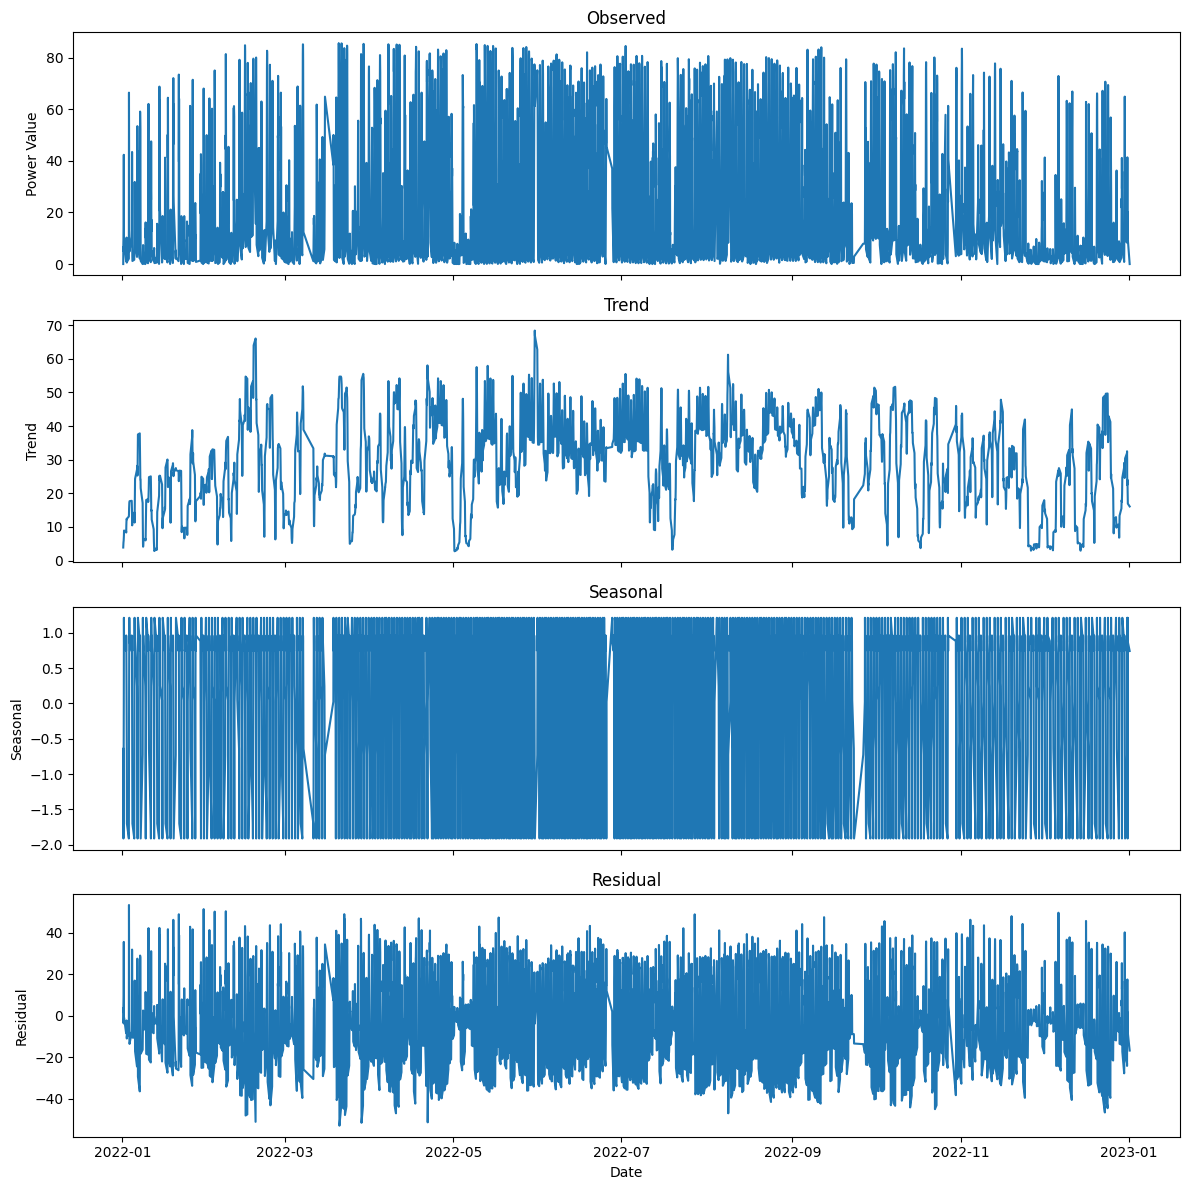

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Фильтрация данных для периода от '2022-01-01 08:00:00' до '2024-01-01 08:00:00'
filtered_df = df[(df['date_time_clouds'] >= '2022-01-01 08:00:00') & (df['date_time_clouds'] <= '2023-01-01 08:00:00')]

# Убедимся, что данные отсортированы по 'date_time_clouds'
filtered_df = filtered_df.sort_values('date_time_clouds')

# Выполнение декомпозиции временного ряда
# Укажите период сезонности. Например, если данные почасовые и сезонность ожидается по дням, период может быть 24.
decomposition = seasonal_decompose(filtered_df['power_value'], model='additive', period=12, extrapolate_trend='freq')

# Построение графиков компонентов декомпозиции
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
ax1.plot(filtered_df['date_time_clouds'], decomposition.observed)
ax1.set_title('Observed')
ax1.set_ylabel('Power Value')

ax2.plot(filtered_df['date_time_clouds'], decomposition.trend)
ax2.set_title('Trend')
ax2.set_ylabel('Trend')

ax3.plot(filtered_df['date_time_clouds'], decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.set_ylabel('Seasonal')

ax4.plot(filtered_df['date_time_clouds'], decomposition.resid)
ax4.set_title('Residual')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


<ipython-input-22-ad6dd4564f74>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_df['power_value'].fillna(method='ffill', inplace=True)
<ipython-input-22-ad6dd4564f74>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_df['power_value'].fillna(method='ffill', inplace=True)


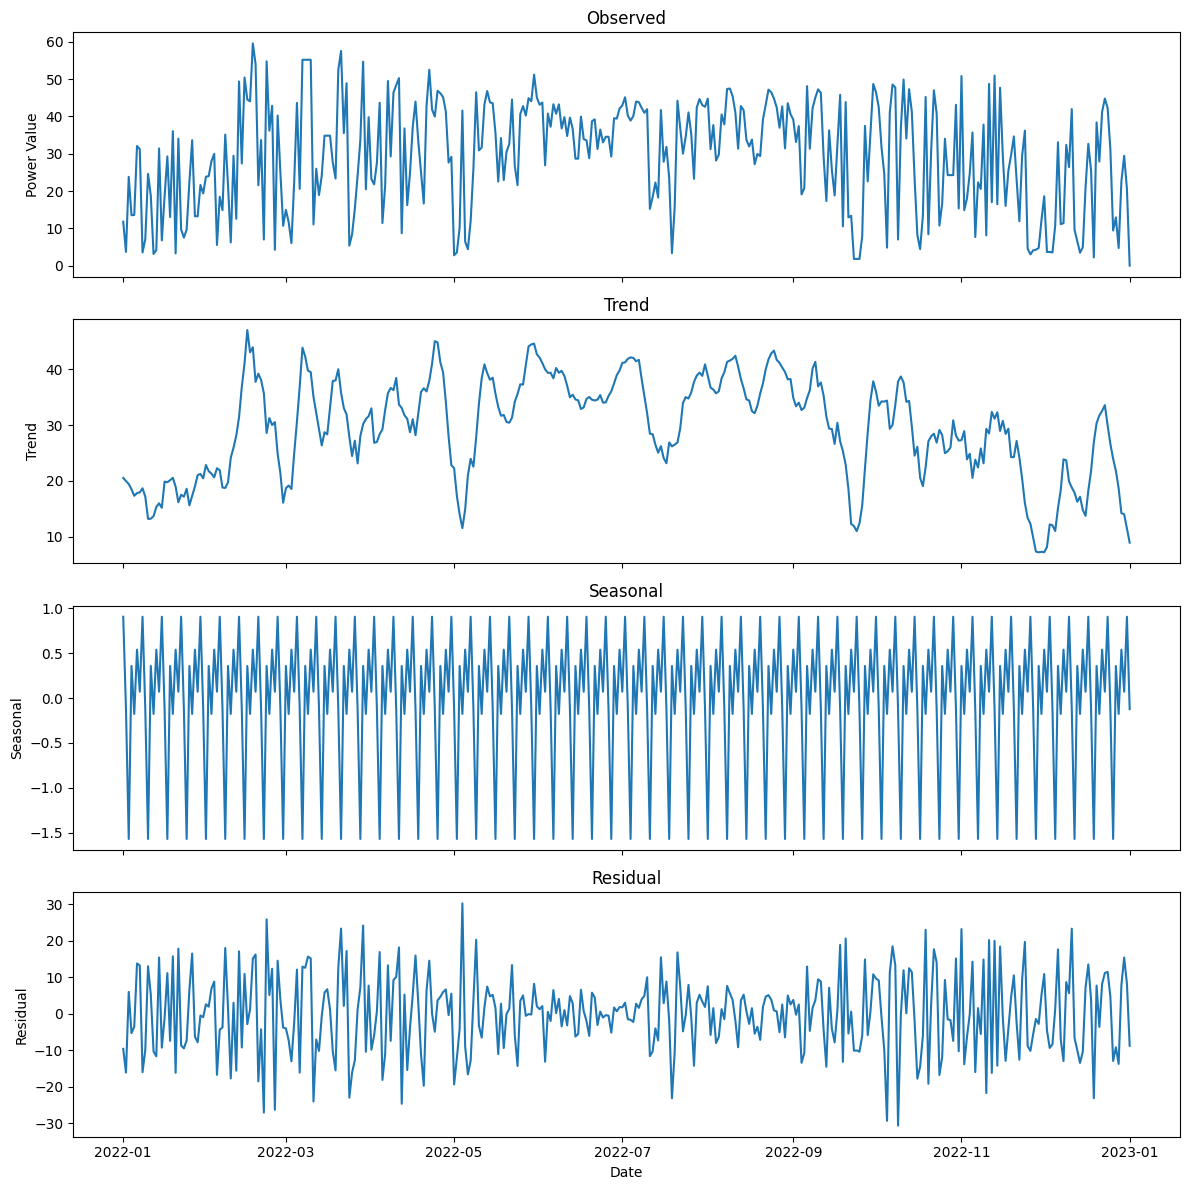

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Преобразование колонки 'date_time_clouds' в формат даты и времени, если это еще не сделано
df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])

# Фильтрация данных для периода от '2022-01-01 08:00:00' до '2023-01-01 08:00:00'
filtered_df = df[(df['date_time_clouds'] >= '2022-01-01 08:00:00') & (df['date_time_clouds'] <= '2023-01-01 08:00:00')]

# Убедимся, что данные отсортированы по 'date_time_clouds'
filtered_df = filtered_df.sort_values('date_time_clouds')

# Преобразование данных с частоты H на D и вычисление среднего значения за день
daily_df = filtered_df.resample('D', on='date_time_clouds').mean()

# Заполнение пропущенных значений методом 'ffill' (или используйте 'bfill' в зависимости от предпочтений)
daily_df['power_value'].fillna(method='ffill', inplace=True)

# Выполнение декомпозиции временного ряда с дневной частотой
decomposition = seasonal_decompose(daily_df['power_value'], model='additive', period=7, extrapolate_trend='freq')  # период 7 для недельной сезонности

# Построение графиков компонентов декомпозиции
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
ax1.plot(daily_df.index, decomposition.observed)
ax1.set_title('Observed')
ax1.set_ylabel('Power Value')

ax2.plot(daily_df.index, decomposition.trend)
ax2.set_title('Trend')
ax2.set_ylabel('Trend')

ax3.plot(daily_df.index, decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.set_ylabel('Seasonal')

ax4.plot(daily_df.index, decomposition.resid)
ax4.set_title('Residual')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


<ipython-input-23-bda5d6cd0eec>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_df['power_value'].fillna(method='ffill', inplace=True)
<ipython-input-23-bda5d6cd0eec>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_df['power_value'].fillna(method='ffill', inplace=True)


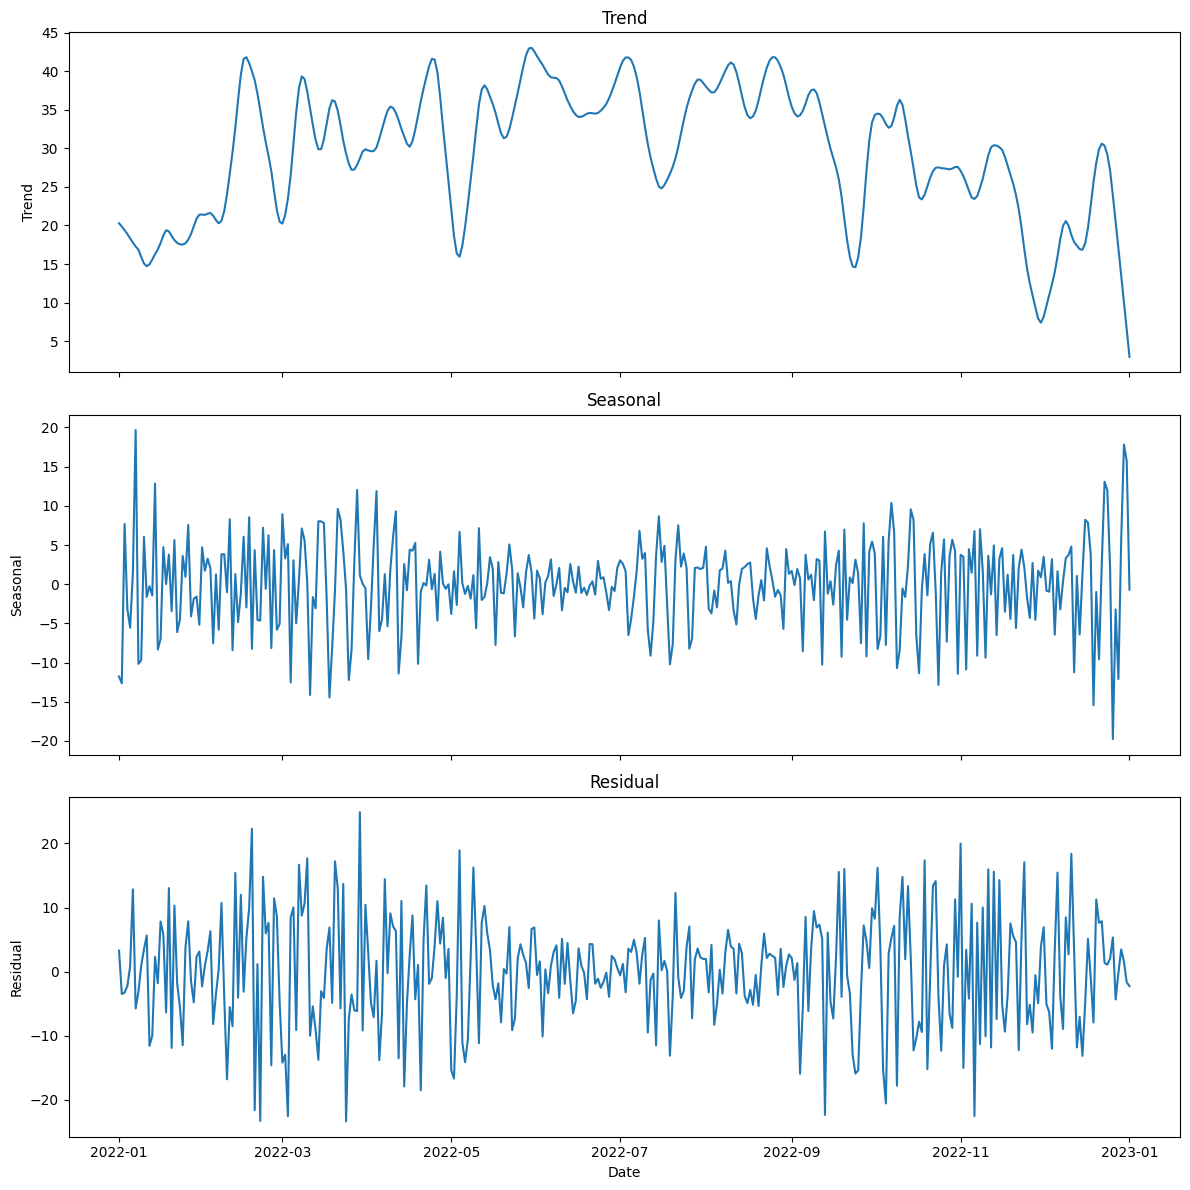

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Преобразование колонки 'date_time_clouds' в формат даты и времени, если это еще не сделано
df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])

# Фильтрация данных для периода от '2022-01-01 08:00:00' до '2023-01-01 08:00:00'
filtered_df = df[(df['date_time_clouds'] >= '2022-01-01 08:00:00') & (df['date_time_clouds'] <= '2023-01-01 08:00:00')]

# Убедимся, что данные отсортированы по 'date_time_clouds'
filtered_df = filtered_df.sort_values('date_time_clouds')

# Преобразование данных с частоты H на D и вычисление среднего значения за день
daily_df = filtered_df.resample('D', on='date_time_clouds').mean()

# Заполнение пропущенных значений методом 'ffill' (или используйте 'bfill' в зависимости от предпочтений)
daily_df['power_value'].fillna(method='ffill', inplace=True)

# Выполнение STL-декомпозиции
stl = STL(daily_df['power_value'], seasonal=7)  # Период 7 для недельной сезонности
result = stl.fit()

# Построение графиков компонентов STL-декомпозиции
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(daily_df.index, result.trend)
ax1.set_title('Trend')
ax1.set_ylabel('Trend')

ax2.plot(daily_df.index, result.seasonal)
ax2.set_title('Seasonal')
ax2.set_ylabel('Seasonal')

ax3.plot(daily_df.index, result.resid)
ax3.set_title('Residual')
ax3.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


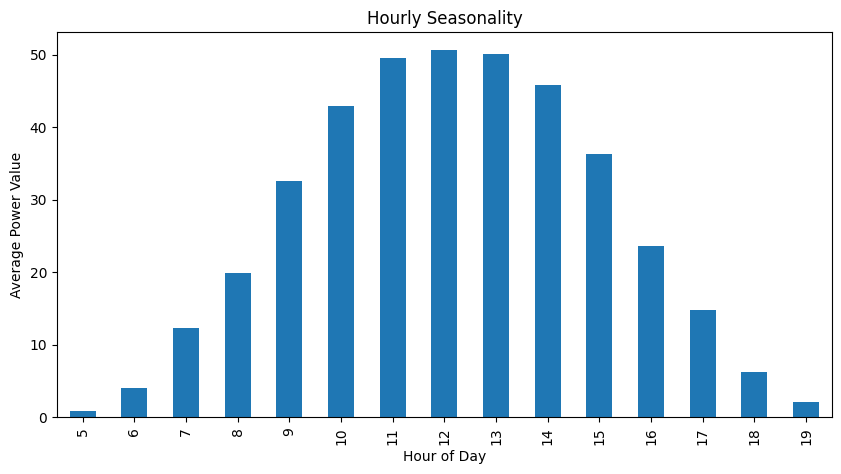

In [24]:
# Рассчитываем среднее значение для каждого часа
hourly_seasonality = df.groupby(df['date_time_clouds'].dt.hour)['power_value'].mean()

# Визуализация
hourly_seasonality.plot(kind='bar', figsize=(10, 5), title="Hourly Seasonality")
plt.xlabel("Hour of Day")
plt.ylabel("Average Power Value")
plt.show()


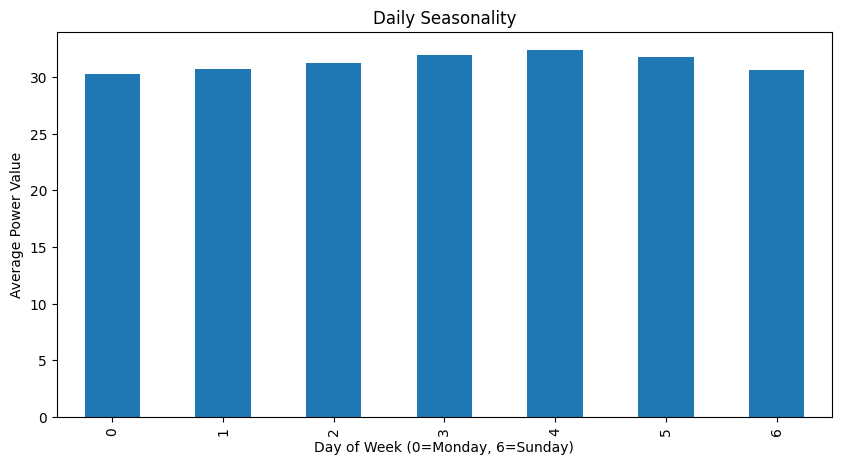

In [25]:
# Рассчитываем среднее значение для каждого дня недели
daily_seasonality = df.groupby(df['date_time_clouds'].dt.dayofweek)['power_value'].mean()

# Визуализация
daily_seasonality.plot(kind='bar', figsize=(10, 5), title="Daily Seasonality")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Power Value")
plt.show()


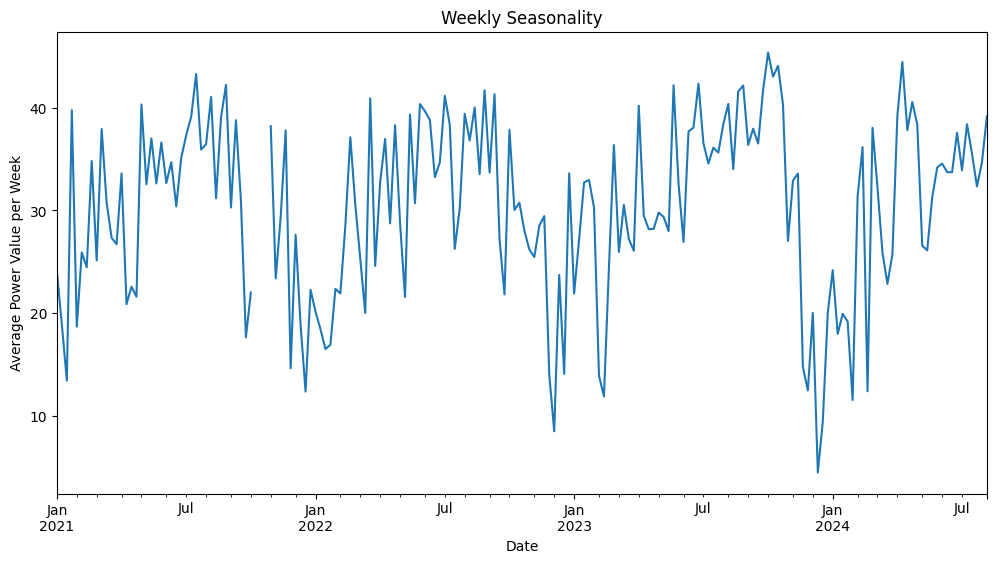

In [26]:
# Преобразуем временные метки в недельные периоды
weekly_df = df.resample('W-Mon', on='date_time_clouds')['power_value'].mean()

# Визуализация недельной сезонности
weekly_df.plot(figsize=(12, 6), title="Weekly Seasonality")
plt.xlabel("Date")
plt.ylabel("Average Power Value per Week")
plt.show()


Частота: 0.0046 (циклов в день), Амплитуда: 1988.88, Период: 218.00 дней
Частота: 0.0115 (циклов в день), Амплитуда: 2076.57, Период: 87.20 дней
Частота: 0.0031 (циклов в день), Амплитуда: 2947.21, Период: 327.00 дней
Частота: 0.0038 (циклов в день), Амплитуда: 2958.73, Период: 261.60 дней
Частота: 0.0023 (циклов в день), Амплитуда: 3711.09, Период: 436.00 дней


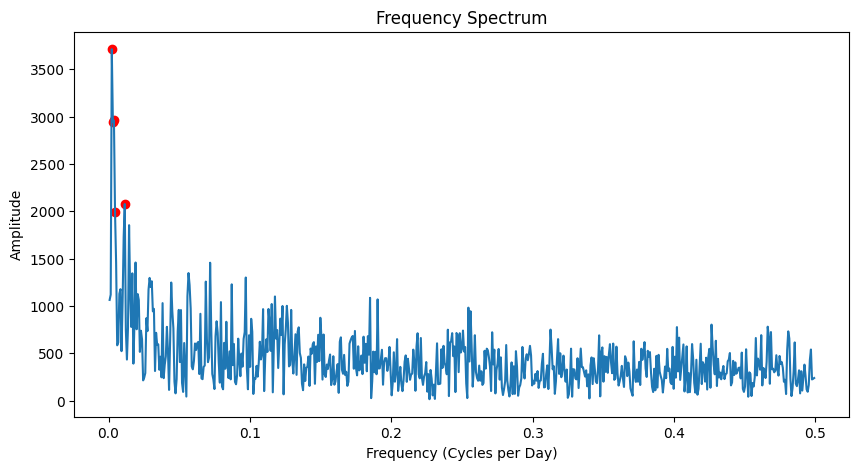

In [27]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Преобразуем данные во временной ряд с равномерной частотой (например, на дневной основе)
daily_series = df.set_index('date_time_clouds').resample('D')['power_value'].mean().fillna(0)

# Применение быстрого преобразования Фурье (FFT)
fft_values = fft(daily_series.values)
fft_magnitude = np.abs(fft_values)

# Создаем ось частот
frequencies = np.fft.fftfreq(len(fft_magnitude), d=1)  # 'd' — шаг данных (1 день, если данные дневные)

# Оставляем только положительные частоты
positive_frequencies = frequencies[1:len(frequencies)//2]
positive_magnitude = fft_magnitude[1:len(fft_magnitude)//2]

# Находим наиболее выраженные частоты
top_n = 5
top_indices = np.argsort(positive_magnitude)[-top_n:]  # Индексы топ-5 частот с наибольшей амплитудой
top_frequencies = positive_frequencies[top_indices]
top_magnitudes = positive_magnitude[top_indices]
top_periods = 1 / top_frequencies  # Периоды в днях

# Вывод результатов
for i in range(top_n):
    print(f"Частота: {top_frequencies[i]:.4f} (циклов в день), Амплитуда: {top_magnitudes[i]:.2f}, Период: {top_periods[i]:.2f} дней")

# Визуализация спектра частот
plt.figure(figsize=(10, 5))
plt.plot(positive_frequencies, positive_magnitude)
plt.scatter(top_frequencies, top_magnitudes, color='red')  # Отметим наиболее выраженные частоты
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Cycles per Day)")
plt.ylabel("Amplitude")
plt.show()


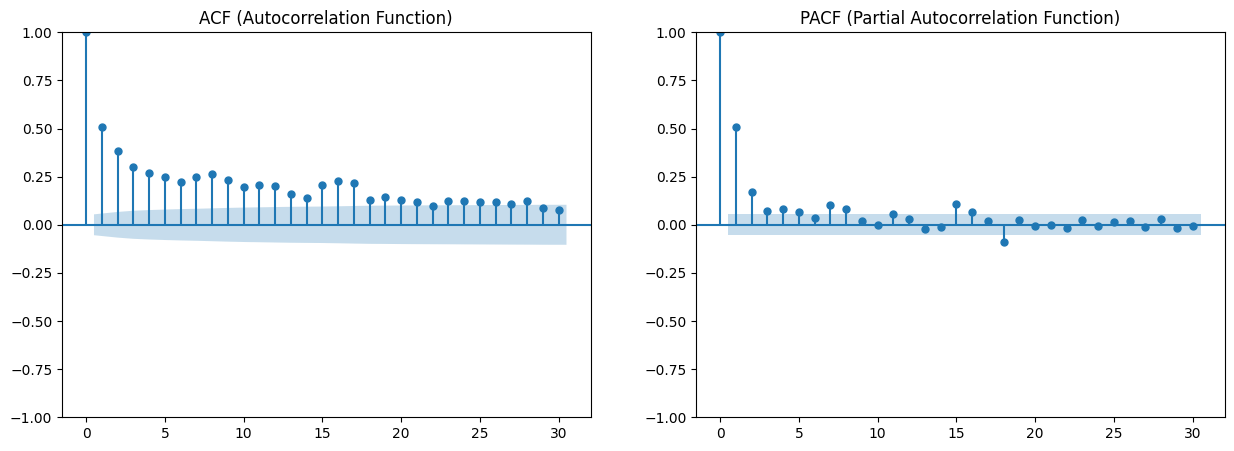

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Преобразование колонки 'date_time_clouds' в формат даты и времени, если это еще не сделано
df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])

# Преобразование данных на дневной уровень (если данные почасовые, их можно агрегировать)
daily_series = df.set_index('date_time_clouds').resample('D')['power_value'].mean().fillna(0)

# Построение ACF и PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# ACF (автокорреляционная функция)
sm.graphics.tsa.plot_acf(daily_series, lags=30, ax=ax1)
ax1.set_title("ACF (Autocorrelation Function)")

# PACF (частичная автокорреляционная функция)
sm.graphics.tsa.plot_pacf(daily_series, lags=30, ax=ax2)
ax2.set_title("PACF (Partial Autocorrelation Function)")

plt.show()


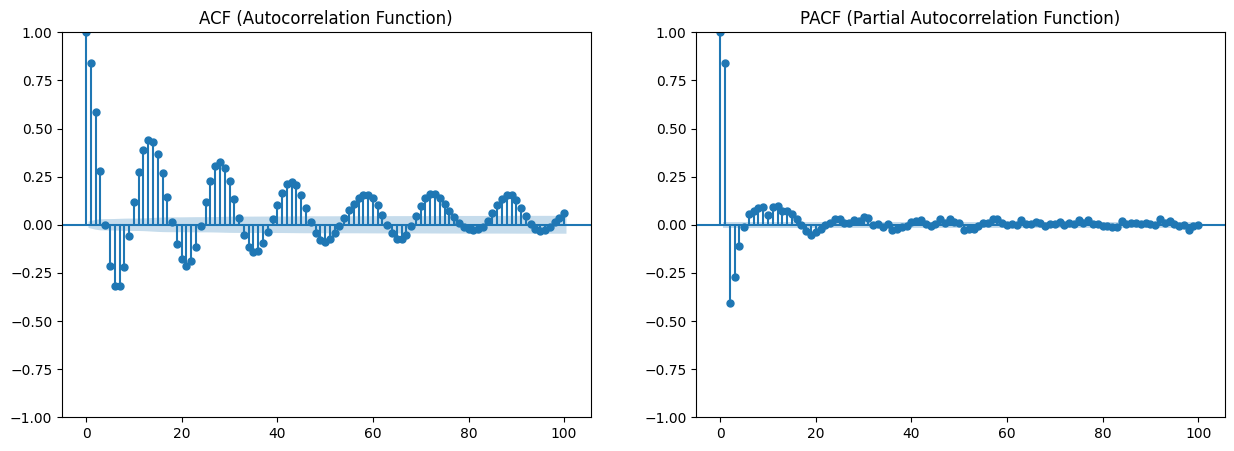

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Преобразование колонки 'date_time_clouds' в формат даты и времени, если это еще не сделано
df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])

# Преобразование данных на дневной уровень (если данные почасовые, их можно агрегировать)
daily_series = df.set_index('date_time_clouds')['power_value']

# Построение ACF и PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# ACF (автокорреляционная функция)
sm.graphics.tsa.plot_acf(daily_series, lags=100, ax=ax1)
ax1.set_title("ACF (Autocorrelation Function)")

# PACF (частичная автокорреляционная функция)
sm.graphics.tsa.plot_pacf(daily_series, lags=100, ax=ax2)
ax2.set_title("PACF (Partial Autocorrelation Function)")

plt.show()


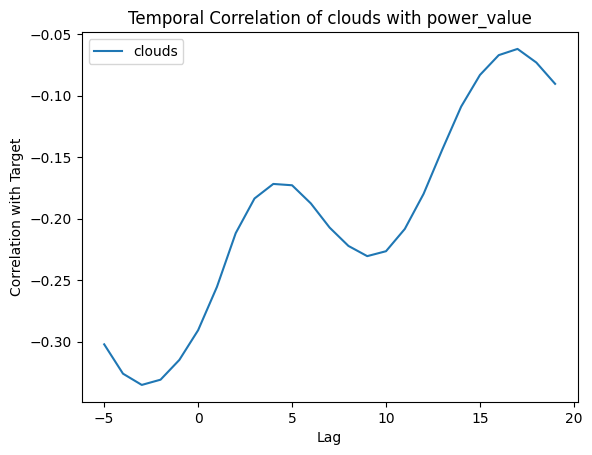

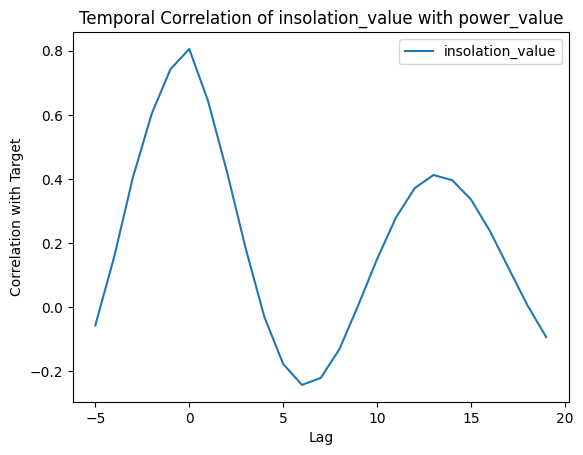

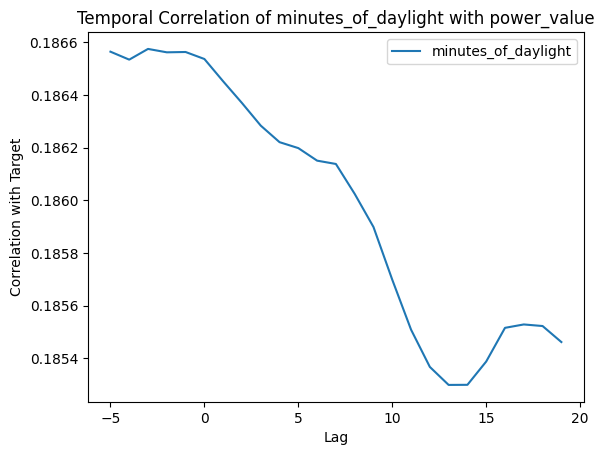

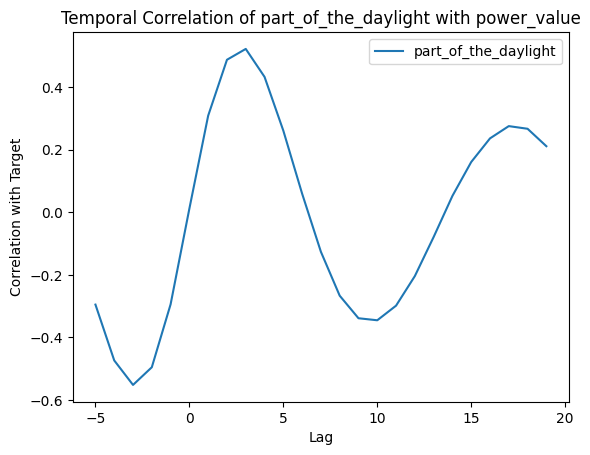

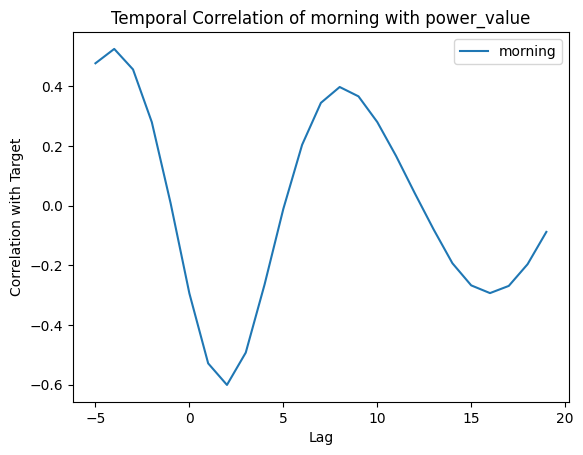

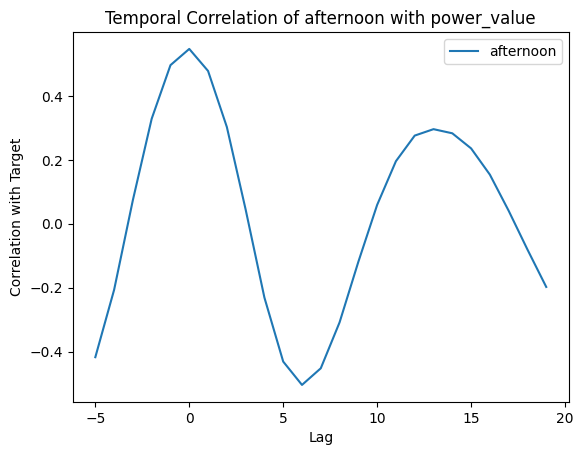

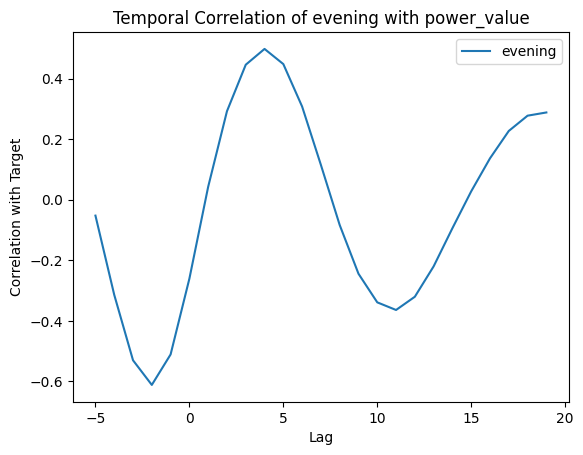

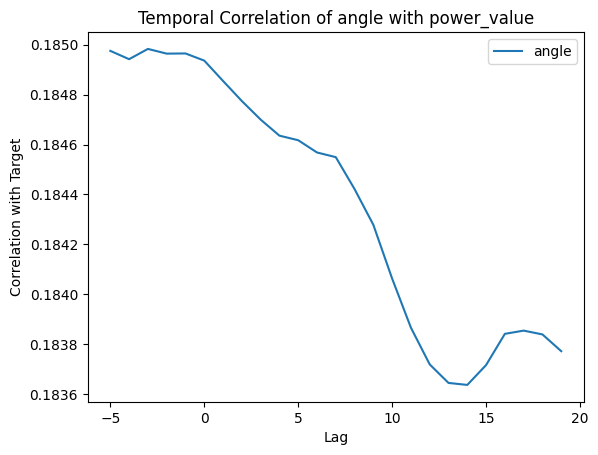

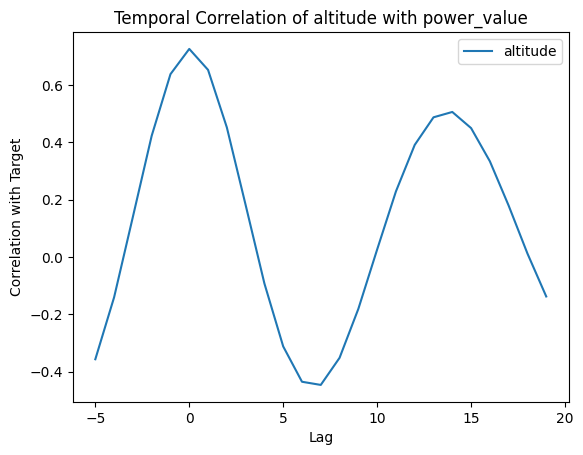

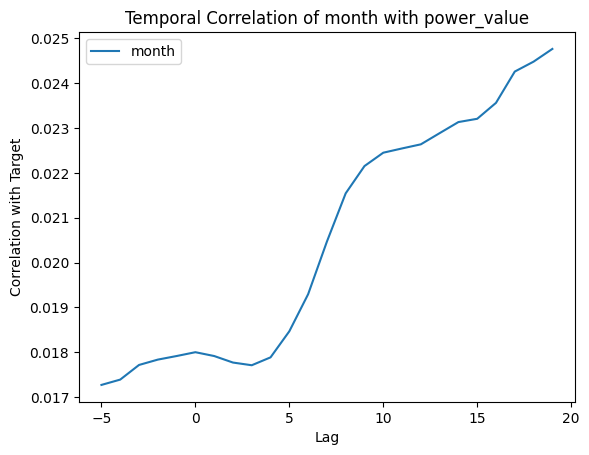

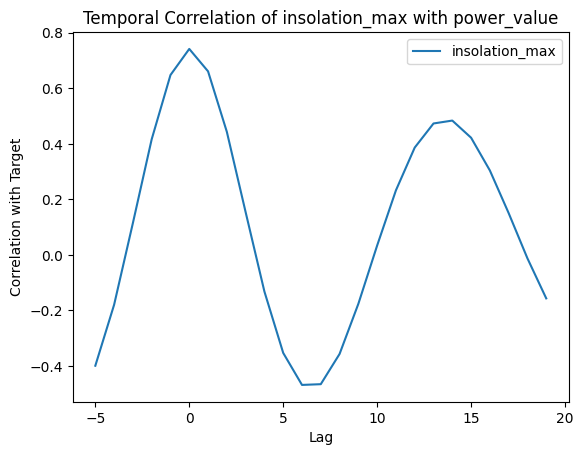

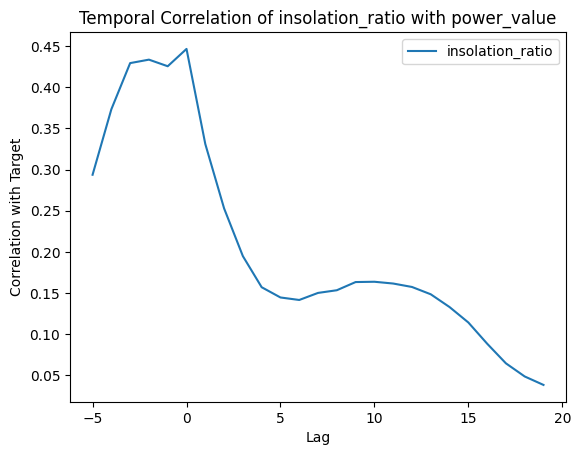

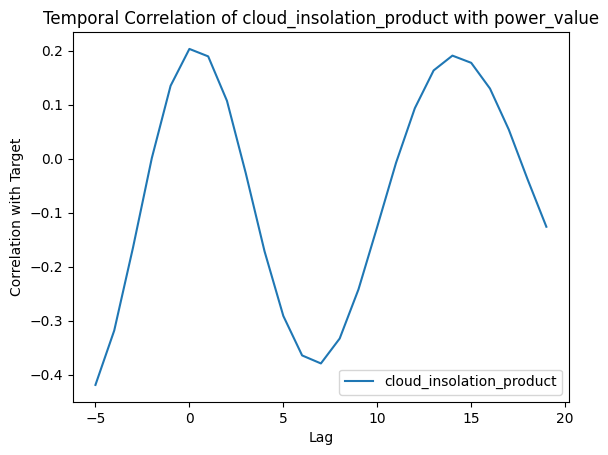

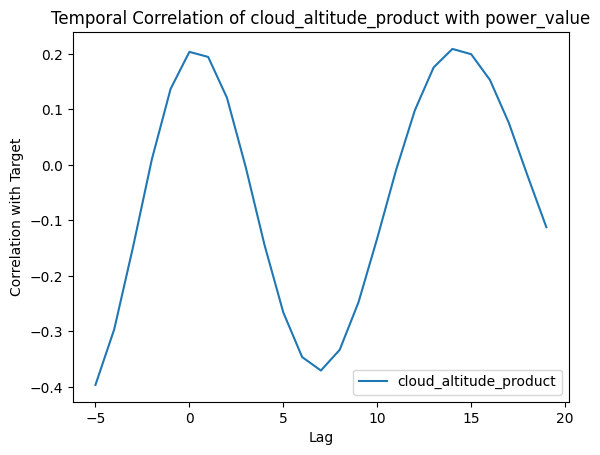

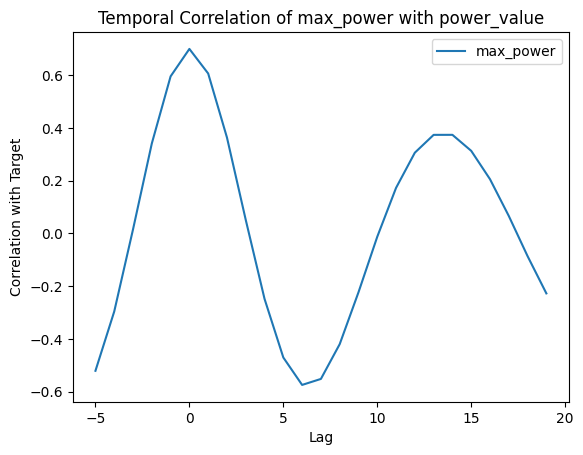

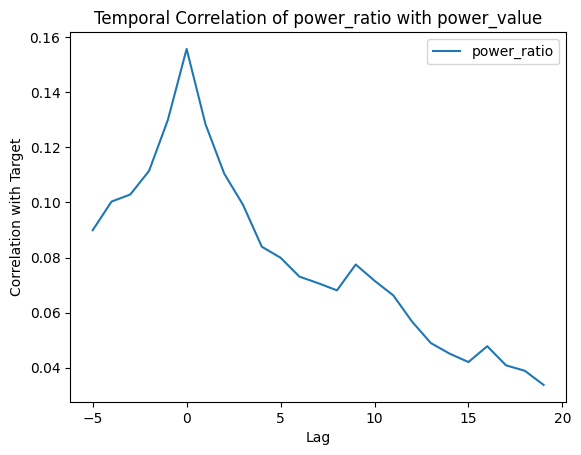

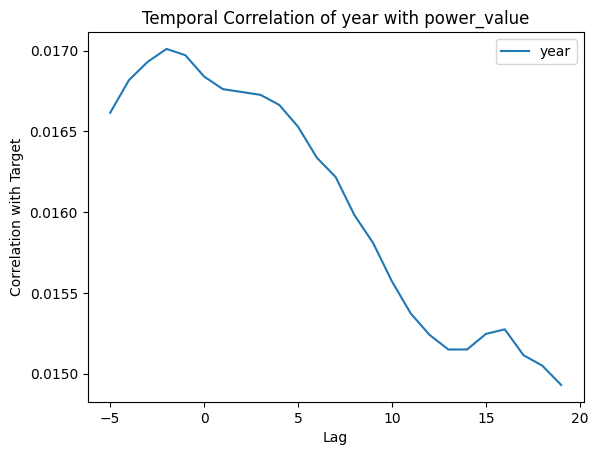

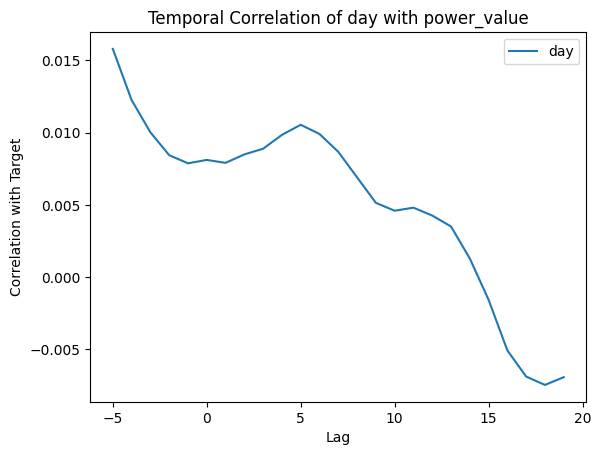

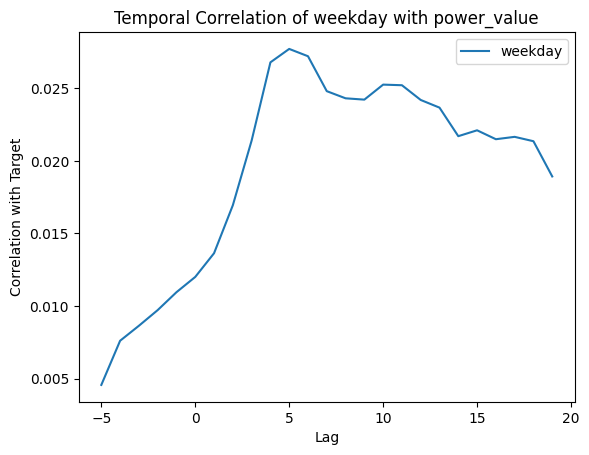

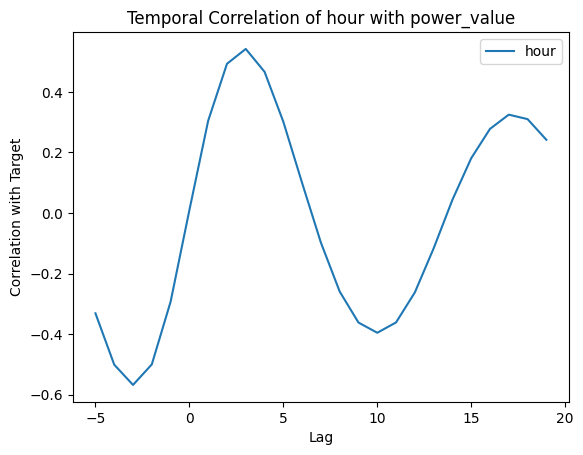

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Предположим, что у нас есть DataFrame с признаками и таргетом
# Данные должны быть отсортированы по времени
# data['date_time_clouds'] - временная метка
# data['power_value'] - целевая переменная (таргет)
# Остальные столбцы - признаки

def calculate_lagged_correlation(data, target_col, feature_cols, lag_range):
    # Словарь для хранения корреляций
    lagged_correlations = {col: [] for col in feature_cols}

    # Вычисляем корреляцию для каждого признака на каждом лаге
    for lag in lag_range:
        for col in feature_cols:
            # Сдвигаем таргет на заданный лаг
            shifted_target = data[target_col].shift(lag)
            # Рассчитываем корреляцию признака с сдвинутым таргетом, пропуски игнорируются
            correlation = data[col].corr(shifted_target)
            lagged_correlations[col].append(correlation)

    # Преобразуем результаты в DataFrame для удобства отображения
    lagged_corr_df = pd.DataFrame(lagged_correlations, index=lag_range)
    return lagged_corr_df

# Пример использования функции
lag_range = range(-5, 20)  # Диапазон лагов от -5 до +5
target_col = 'power_value'
feature_cols = [col for col in df.columns if col != 'power_value' and col != 'date_time_clouds']

lagged_corr_df = calculate_lagged_correlation(df, target_col, feature_cols, lag_range)

# Построим графики корреляции для каждого признака
for col in feature_cols:
    plt.plot(lag_range, lagged_corr_df[col], label=col)
    plt.xlabel('Lag')
    plt.ylabel('Correlation with Target')
    plt.title(f'Temporal Correlation of {col} with {target_col}')
    plt.legend()
    plt.show()


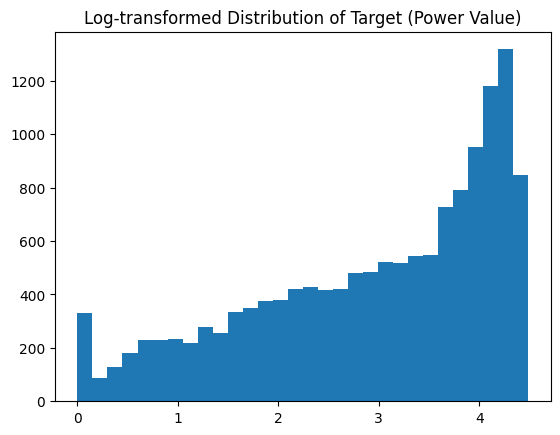

Количество выбросов: 0


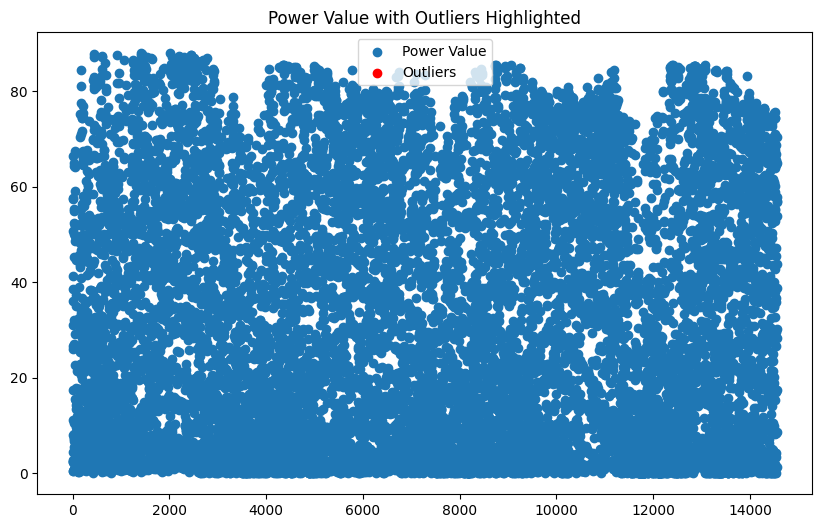

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразуем данные с помощью логарифма
log_power_value = np.log1p(df['power_value'])  # Используем log1p для обработки значений от 0

# Визуализируем распределение
plt.hist(log_power_value, bins=30)
plt.title('Log-transformed Distribution of Target (Power Value)')
plt.show()
Q1 = log_power_value.quantile(0.25)
Q3 = log_power_value.quantile(0.75)
IQR = Q3 - Q1

# Диапазон для выбросов после лог-преобразования
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = df[(log_power_value < lower_bound) | (log_power_value > upper_bound)]
print("Количество выбросов:", len(outliers))
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['power_value'], label='Power Value')
plt.scatter(outliers.index, outliers['power_value'], color='red', label='Outliers')
plt.legend()
plt.title('Power Value with Outliers Highlighted')
plt.show()




In [32]:
import pandas as pd

# Пример загрузки данных

df_anl_cloud = pd.DataFrame()
# Нормализация данных (если данные разного масштаба)
df_anl_cloud['clouds_normalized'] = df['clouds'] / df['clouds'].max()
df_anl_cloud['power_value_normalized'] = df['power_value'] / df['power_value'].max()

# Установка порогов (например, высокая облачность > 0.5, высокая мощность > 0.5)
cloud_threshold = 0.5
power_threshold = 0.5

# Выявление "ошибок" прогноза облачности
# Например, высокая облачность, но высокая мощность указывает на потенциальную ошибку в прогнозе облачности
df_anl_cloud['cloud_mismatch'] = (df_anl_cloud['clouds_normalized'] > cloud_threshold) & (df_anl_cloud['power_value_normalized'] > power_threshold)

# Вывод строк, где облачность не соответствует мощности
mismatch_df = df_anl_cloud[df_anl_cloud['cloud_mismatch']]
print("Ошибочные прогнозы облачности:\n", mismatch_df)
print('Процент ложных прогнозов по облочности', len(mismatch_df)/len(df)*100)



Ошибочные прогнозы облачности:
        clouds_normalized  power_value_normalized  cloud_mismatch
5                  0.894                0.754413            True
13                 0.606                0.576677            True
29                 1.000                0.569241            True
30                 0.894                0.630225            True
31                 0.825                0.738201            True
...                  ...                     ...             ...
14509              1.000                0.668851            True
14510              1.000                0.727205            True
14540              0.620                0.535650            True
14554              0.540                0.738907            True
14555              0.720                0.611459            True

[1989 rows x 3 columns]
Процент ложных прогнозов по облочности 13.996200126662444


In [33]:
# Объединяем колонку 'cloud_mismatch' из дополнительного датафрейма df_anl_cloud с основным df по индексам
df_anl_cloud_all = df.join(df_anl_cloud[['cloud_mismatch']], rsuffix='_from_anl')
df_anl_cloud_all

date_time_clouds  clouds  insolation_value  power_value  \
0     2021-01-01 08:00:00   0.291          2.719515     0.510000   
1     2021-01-01 09:00:00   0.299         26.143628     2.280000   
2     2021-01-01 10:00:00   0.291         52.785677     4.556000   
3     2021-01-01 11:00:00   0.291        112.734060    11.151290   
4     2021-01-01 12:00:00   0.292        222.726500    26.058584   
...                   ...     ...               ...          ...   
14555 2024-07-31 15:00:00   0.720        389.411875    53.808429   
14556 2024-07-31 16:00:00   0.580        401.925208    43.813789   
14557 2024-07-31 17:00:00   0.660        380.588235    28.340835   
14558 2024-07-31 18:00:00   0.630        161.621875     8.555597   
14559 2024-07-31 19:00:00   0.290         32.097500     1.366645   

       minutes_of_daylight  part_of_the_daylight  morning  afternoon  evening  \
0                    530.0              0.018868        1          0        0   
1                    530.0              0.132075        1          0        0   
2                    530.0              0.245283        1          0        0   
3                    530.0              0.358491        0          1        0   
4                    530.0              0.471698        0          1        0   
...                    ...                   ...      ...        ...      ...   
14555                883.0              0.684032        0          0        1   
14556                883.0              0.751982        0          0        1   
14557                883.0              0.819932        0          0        1   
14558                883.0              0.887882        0          0        1   
14559                883.0              0.955832        0          0        1   

           angle  ...  insolation_ratio  cloud_insolation_product  \
0     -23.011637  ...          0.701274                  1.128488   
1     -23.011637  ...          0.207486                 37.674517   
2     -23.011637  ...          0.203761                 75.385460   
3     -23.011637  ...          0.313848                104.527082   
4     -23.011637  ...          0.549018                118.458979   
...          ...  ...               ...                       ...   
14555  17.913188  ...          0.534318                524.736995   
14556  17.913188  ...          0.704358                330.963101   
14557  17.913188  ...          0.971216                258.632783   
14558  17.913188  ...          0.759482                134.067383   
14559  17.913188  ...          0.555666                 16.751566   

       cloud_altitude_product  max_power  power_ratio  year  day  weekday  \
0                    0.175032   2.094194     0.243530  2021    1        4   
1                    2.606374  29.968810     0.076079  2021    1        4   
2                    4.444369  51.993808     0.087626  2021    1        4   
3                    5.756810  66.750809     0.167059  2021    1        4   
4                    6.369172  73.258227     0.355709  2021    1        4   
...                       ...        ...          ...   ...  ...      ...   
14555               33.600282  61.912202     0.869109  2024   31        2   
14556               21.248264  45.846351     0.955666  2024   31        2   
14557               17.238246  28.900160     0.980646  2024   31        2   
14558                9.815618  13.655873     0.626514  2024   31        2   
14559                1.555676   2.753853     0.496267  2024   31        2   

       hour  cloud_mismatch  
0         8           False  
1         9           False  
2        10           False  
3        11           False  
4        12           False  
...     ...             ...  
14555    15            True  
14556    16           False  
14557    17           False  
14558    18           False  
14559    19           False  

[14211 rows x 23 columns]

Генерация признаков и разметка данных

In [34]:
!pip install holidays

In [35]:
import holidays

# Преобразуем колонку 'date_time_clouds' в формат datetime, если это ещё не было сделано
df_1['date_time_clouds'] = pd.to_datetime(df_1['date_time_clouds'])

# Указываем страну для определения праздников, например, Россия
ru_holidays = holidays.Russia()

# Добавляем признак 'is_holiday' (1 - если праздник, 0 - если нет)
df_1['is_holiday'] = df_1['date_time_clouds'].dt.date.apply(lambda x: 1 if x in ru_holidays else 0)

# Добавляем остальные временные признаки
df_1['year'] = df_1['date_time_clouds'].dt.year
df_1['quarter'] = df_1['date_time_clouds'].dt.quarter
df_1['season'] = df_1['date_time_clouds'].dt.month % 12 // 3 + 1  # 1 - зима, 2 - весна, 3 - лето, 4 - осень
df_1['month'] = df_1['date_time_clouds'].dt.month
df_1['day'] = df_1['date_time_clouds'].dt.day
df_1['day_of_week'] = df_1['date_time_clouds'].dt.dayofweek  # 0 - Понедельник, 6 - Воскресенье
df_1['hour'] = df_1['date_time_clouds'].dt.hour

# Периодические признаки (синус и косинус) для часа, дня, дня недели, месяца, квартала и сезона
df_1['hour_sin'] = np.sin(2 * np.pi * df_1['hour'] / 24)
df_1['hour_cos'] = np.cos(2 * np.pi * df_1['hour'] / 24)

df_1['day_sin'] = np.sin(2 * np.pi * df_1['day'] / 31)  # Допущение: 31 день в месяце
df_1['day_cos'] = np.cos(2 * np.pi * df_1['day'] / 31)

df_1['day_of_week_sin'] = np.sin(2 * np.pi * df_1['day_of_week'] / 7)
df_1['day_of_week_cos'] = np.cos(2 * np.pi * df_1['day_of_week'] / 7)

df_1['month_sin'] = np.sin(2 * np.pi * df_1['month'] / 12)
df_1['month_cos'] = np.cos(2 * np.pi * df_1['month'] / 12)

df_1['quarter_sin'] = np.sin(2 * np.pi * df_1['quarter'] / 4)
df_1['quarter_cos'] = np.cos(2 * np.pi * df_1['quarter'] / 4)

df_1['season_sin'] = np.sin(2 * np.pi * df_1['season'] / 4)
df_1['season_cos'] = np.cos(2 * np.pi * df_1['season'] / 4)
# Объединяем колонку 'cloud_mismatch' из дополнительного датафрейма df_anl_cloud с основным df по индексам
df_1 = df_1.join(df_anl_cloud[['cloud_mismatch']], rsuffix='_from_anl')
df_1.to_excel('q2.xlsx')


Построение наивной базовой модели

Mean Absolute Error (MAE): 13.79564672112028
R^2 Score: 0.45231740284184574
SMAPE: 57.62%


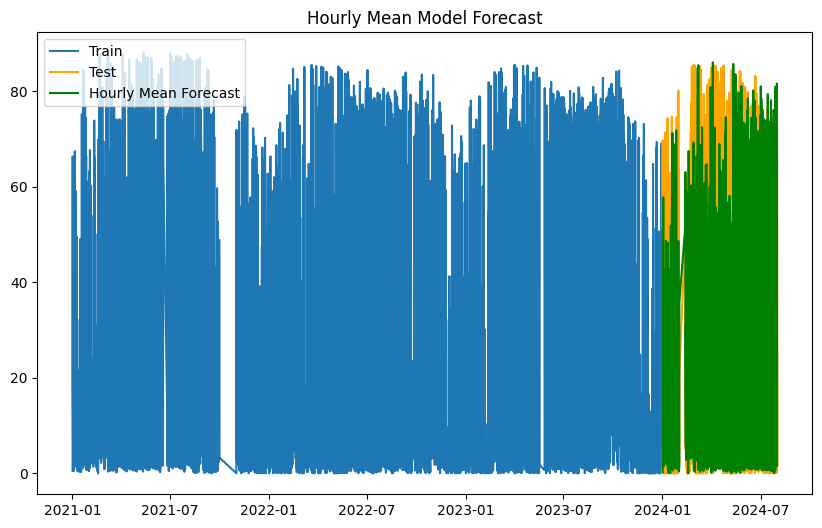

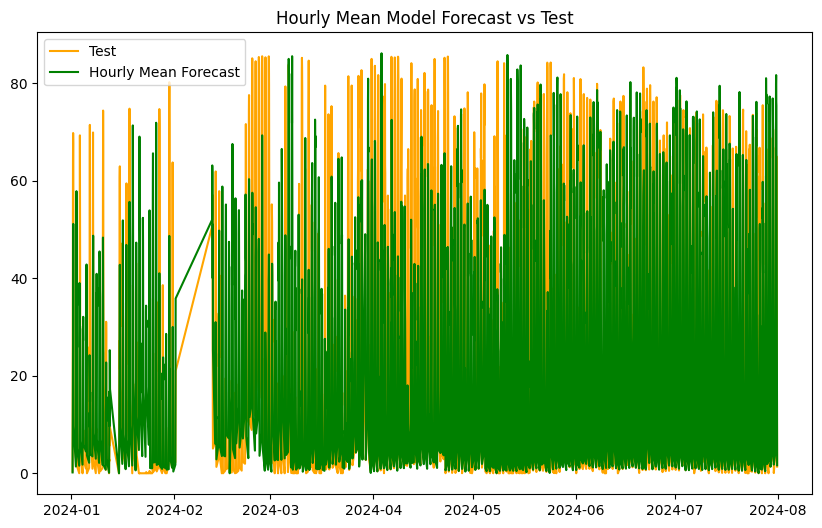

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Убедимся, что дата отсортирована по времени
df_baseline = df.copy()
df_baseline = df_baseline.sort_values(by='date_time_clouds')
df_baseline.set_index('date_time_clouds', inplace=True)

# Создаем признаки для выделения часа и дня
df_baseline['hour'] = df_baseline.index.hour
df_baseline['day_of_year'] = df_baseline.index.dayofyear

# Используем данные до 2024 года как тренировочные
train = df_baseline[df_baseline.index.year < 2024]
test = df_baseline[df_baseline.index.year == 2024]

# Рассчитываем среднее значение для каждого часа и дня в году на тренировочных данных
hourly_means = train.groupby(['day_of_year', 'hour'])['power_value'].mean()

# Создаем прогноз для тестового набора (данные на 2024 год), используя средние значения
forecast = []
for idx, row in test.iterrows():
    day_of_year = row.name.dayofyear
    hour = row.name.hour
    # Используем среднее значение для данного часа и дня года
    forecast.append(hourly_means.loc[(day_of_year, hour)] if (day_of_year, hour) in hourly_means.index else np.nan)

# Преобразуем прогноз в Series для удобства
forecast = pd.Series(forecast, index=test.index)

# Заполняем пропуски в прогнозе линейной интерполяцией
forecast.interpolate(method='linear', inplace=True)

# Оцениваем точность модели
mae = mean_absolute_error(test['power_value'], forecast)
r2 = r2_score(test['power_value'], forecast)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


# Расчет SMAPE (Symmetric Mean Absolute Percentage Error)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Вычисляем SMAPE для y_test и y_pred
smape_value = smape(test['power_value'], forecast)
print(f"SMAPE: {smape_value:.2f}%")



# Визуализация прогноза и реальных значений
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['power_value'], label='Train')
plt.plot(test.index, test['power_value'], label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Hourly Mean Forecast', color='green')
plt.legend()
plt.title('Hourly Mean Model Forecast')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test.index, test['power_value'], label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Hourly Mean Forecast', color='green')
plt.legend()
plt.title('Hourly Mean Model Forecast vs Test')
plt.show()

In [37]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


Построение модели с помошью катбуста! боевая модель

0:	learn: 19.3652968	test: 21.5244120	best: 21.5244120 (0)	total: 47.1ms	remaining: 47.1s
100:	learn: 4.8119443	test: 4.6089587	best: 4.6089587 (100)	total: 4.38s	remaining: 39s
200:	learn: 4.4096493	test: 4.3800135	best: 4.3800135 (200)	total: 7.55s	remaining: 30s
300:	learn: 4.1911145	test: 4.3251544	best: 4.3236065 (290)	total: 10.8s	remaining: 25s
400:	learn: 4.0288530	test: 4.3086897	best: 4.3080366 (385)	total: 15.5s	remaining: 23.2s
500:	learn: 3.8936511	test: 4.2899136	best: 4.2897046 (499)	total: 18.9s	remaining: 18.9s
600:	learn: 3.7776160	test: 4.2829897	best: 4.2793497 (590)	total: 22.2s	remaining: 14.7s
700:	learn: 3.6710711	test: 4.2777073	best: 4.2750415 (658)	total: 25.4s	remaining: 10.8s
800:	learn: 3.5795461	test: 4.2761085	best: 4.2750415 (658)	total: 30.4s	remaining: 7.55s
900:	learn: 3.4964613	test: 4.2644978	best: 4.2644978 (900)	total: 33.6s	remaining: 3.69s
999:	learn: 3.4166219	test: 4.2629131	best: 4.2614051 (960)	total: 36.8s	remaining: 0us

bestTest = 4.2614

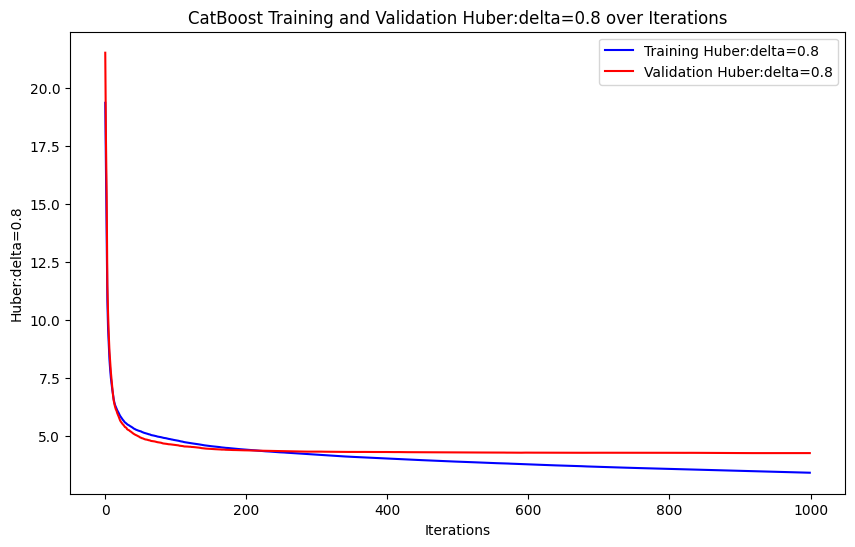

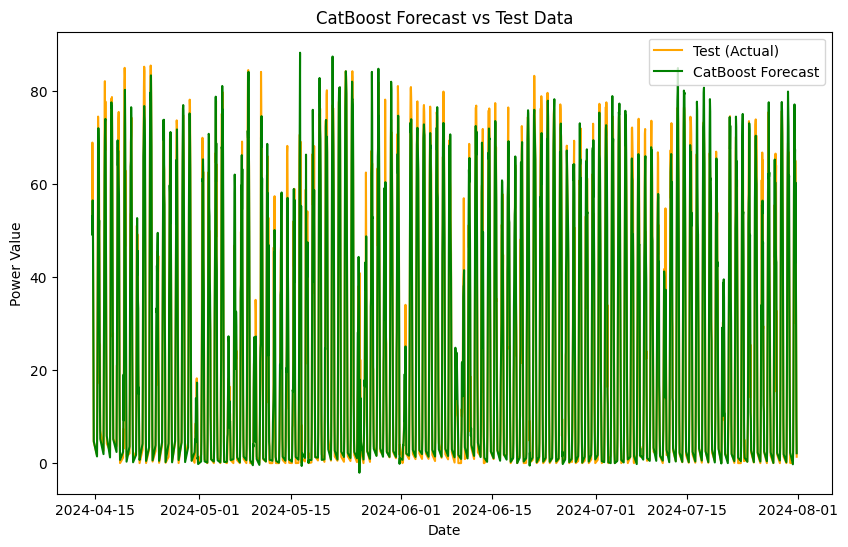

In [139]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# del df_catboost

# Список признаков и таргет
features = [
    'clouds', 'power_value', 'minutes_of_daylight', 'part_of_the_daylight',
    'morning', 'afternoon', 'evening', 'angle', 'altitude', 'month',
    'cloud_insolation_product',
    'cloud_altitude_product', 'is_holiday',
    'year', 'quarter', 'season', 'day', 'day_of_week', 'hour', 'hour_sin',
    'hour_cos', 'day_sin', 'day_cos', 'day_of_week_sin', 'day_of_week_cos',
    'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'season_sin',
    'season_cos','cloud_mismatch','power_value_lag_1', 'clouds_lag_1',
       'hour_sin_lag_1', 'part_of_the_daylight_lag_1', 'power_value_lag_2',
       'clouds_lag_2', 'hour_sin_lag_2', 'part_of_the_daylight_lag_2',
       'power_value_lag_3', 'clouds_lag_3', 'hour_sin_lag_3',
       'part_of_the_daylight_lag_3', 'power_value_lag_4', 'clouds_lag_4',
       'hour_sin_lag_4', 'part_of_the_daylight_lag_4', 'power_value_lag_5',
       'clouds_lag_5', 'hour_sin_lag_5', 'part_of_the_daylight_lag_5',
       'power_value_lag_6', 'clouds_lag_6', 'hour_sin_lag_6',
       'part_of_the_daylight_lag_6', 'power_value_lag_7', 'clouds_lag_7',
       'hour_sin_lag_7', 'part_of_the_daylight_lag_7', 'power_value_lag_8',
       'clouds_lag_8', 'hour_sin_lag_8', 'part_of_the_daylight_lag_8',
       'power_value_lag_9', 'clouds_lag_9', 'hour_sin_lag_9',
       'part_of_the_daylight_lag_9', 'power_value_lag_10', 'clouds_lag_10',
       'hour_sin_lag_10', 'part_of_the_daylight_lag_10', 'power_value_lag_11',
       'clouds_lag_11', 'hour_sin_lag_11', 'part_of_the_daylight_lag_11',
       'power_value_lag_12', 'clouds_lag_12', 'hour_sin_lag_12',
       'part_of_the_daylight_lag_12']
target = 'power_value'

best_features = ['clouds','power_value',
 'minutes_of_daylight',
 'part_of_the_daylight',
 'evening',
 'angle',
 'altitude',
 'cloud_insolation_product',
 'cloud_altitude_product',
 'hour',
 'hour_sin',
 'month_sin',
 'power_value_lag_1',
 'clouds_lag_1',
 'hour_sin_lag_1',
 'part_of_the_daylight_lag_1',
 'power_value_lag_2',
 'clouds_lag_2',
 'part_of_the_daylight_lag_2',
 'power_value_lag_3',
 'clouds_lag_3',
 'part_of_the_daylight_lag_3',
 'power_value_lag_5',
 'part_of_the_daylight_lag_6',
 'power_value_lag_8',
 'power_value_lag_9',
 'power_value_lag_10',
 'power_value_lag_11',
 'part_of_the_daylight_lag_12']
df_1
df_catboost= df_1.copy()
# Создание лагов для power_value от 1 до 12
for lag in range(1, 13):
    df_catboost[f'power_value_lag_{lag}'] = df_catboost['power_value'].shift(lag)
    df_catboost[f'clouds_lag_{lag}'] = df_catboost['clouds'].shift(lag)
    df_catboost[f'hour_sin_lag_{lag}'] = df_catboost['hour_sin'].shift(lag)
    df_catboost[f'part_of_the_daylight_lag_{lag}'] = df_catboost['part_of_the_daylight'].shift(lag)


# 22/0

# df_catboost.to_excel('q4.xlsx')

# Преобразование булевых значений в числовые (0 и 1) для колонки 'cloud_mismatch'
df_catboost['cloud_mismatch'] = df_catboost['cloud_mismatch'].fillna(0).astype(int)

df_catboost.set_index('date_time_clouds', inplace=True)

df_catboost = df_catboost[best_features]

# Определяем категориальные признаки
# categorical_features = [
#     'morning', 'afternoon', 'evening', 'month', 'is_holiday', 'year',
#     'quarter', 'season', 'day', 'day_of_week', 'hour','cloud_mismatch'
# ]

categorical_features = ['evening','hour']


# # Разделение на тренировочную и тестовую выборки (до 2024 года - тренировка, 2024 - тест)

train_data = df_catboost[df_catboost.index.year < 2024]
valid_data = df_catboost[df_catboost.index.year == 2024].iloc[:1000]
test_data = df_catboost[df_catboost.index.year == 2024].iloc[1000:]

ls_fun= 'Huber:delta=0.8'
# Выделяем признаки и целевую переменную
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_valid = valid_data.drop(columns=[target])
y_valid = valid_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]
# Создаем и обучаем модель CatBoost
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    loss_function=ls_fun,
    cat_features=categorical_features,
    verbose=100,
)
model.fit(X_train, y_train,eval_set=(X_test, y_test), verbose=100)

# Прогнозируем на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
wape = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test))
# Вычисление RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Вычисляем SMAPE для y_test и y_pred
smape_value = smape(y_test, y_pred)


print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
# Расчет SMAPE (Symmetric Mean Absolute Percentage Error)
print(f"SMAPE: {smape_value:.2f}%")
# Получение метрик для обучения и валидации
evals_result = model.get_evals_result()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(evals_result['learn'][ls_fun], label=f'Training {ls_fun}', color='blue')
plt.plot(evals_result['validation'][f'{ls_fun}'], label=f'Validation {ls_fun}', color='red')
plt.title(f'CatBoost Training and Validation {ls_fun} over Iterations')
plt.xlabel('Iterations')
plt.ylabel(f'{ls_fun}')
plt.legend()
plt.show()


# Визуализация прогноза и реальных значений только для тестовой выборки
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Test (Actual)', color='orange')
plt.plot(y_test.index, y_pred, label='CatBoost Forecast', color='green')
plt.legend()
plt.title('CatBoost Forecast vs Test Data')
plt.xlabel('Date')
plt.ylabel('Power Value')
plt.show()



In [140]:
# Вывод самых важных признаков по версии модели CatBoost
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

# Создаем DataFrame для удобства отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Сортируем признаки по важности в порядке убывания
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Выводим таблицу с важностью признаков
feature_importance_df.reset_index(drop=True, inplace=True)
feature_importance_df


Feature  Importance
0             power_value_lag_1   26.287115
1                hour_sin_lag_1   19.887443
2    part_of_the_daylight_lag_1    7.113931
3                        clouds    6.469915
4             power_value_lag_9    5.761557
5                     month_sin    4.496458
6        cloud_altitude_product    4.292608
7                      altitude    4.137961
8                      hour_sin    3.600019
9            power_value_lag_10    3.550853
10          minutes_of_daylight    2.868947
11                 clouds_lag_2    2.829961
12   part_of_the_daylight_lag_2    2.169140
13   part_of_the_daylight_lag_6    1.723092
14            power_value_lag_2    1.623129
15                      evening    1.227453
16                        angle    0.986341
17                 clouds_lag_1    0.208721
18           power_value_lag_11    0.140508
19            power_value_lag_8    0.107345
20            power_value_lag_3    0.086140
21         part_of_the_daylight    0.085742
22     cloud_insolation_product    0.073569
23   part_of_the_daylight_lag_3    0.070528
24            power_value_lag_5    0.064065
25                 clouds_lag_3    0.057981
26  part_of_the_daylight_lag_12    0.046341
27                         hour    0.033136

In [77]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np


# Удаление ненужных признаков
df_model = df_catboost.head(5000).copy()

# Разделение данных на признаки (X) и целевую переменную (y)
X = df_model.drop(columns=["power_value"])
y = df_model["power_value"]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Использование рекурсивного удаления признаков с CatBoost и перекрестной проверкой для автоматического выбора числа признаков
estimator = CatBoostRegressor(iterations=500, depth=4, learning_rate=0.1, loss_function='MAPE', verbose=0)
selector = RFECV(estimator, step=3, scoring='neg_mean_absolute_percentage_error')
selector.fit(X_train, y_train)
# Получение индексов отобранных признаков
selected_features = X.columns[selector.support_]

# Вывод выбранных признаков
selected_features.tolist()

# # Применение выбранных признаков
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# # Обучение модели на выбранных признаках
# estimator.fit(X_train_selected, y_train)

# # Прогнозирование на тестовой выборке
# y_pred = estimator.predict(X_test_selected)


Поиск важных фичей

In [109]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Определение параметров для случайного поиска
param_dist = {
    'learning_rate': np.linspace(0.5, 0.15, 5),          # диапазон значений для learning_rate
    'depth': [6, 8]                # регуляризация L2
}

# Инициализация модели CatBoost
model = CatBoostRegressor(cat_features=categorical_features, loss_function='MAPE', verbose=0)

# Установка TimeSeriesSplit для кросс-валидации по временным рядам
tscv = TimeSeriesSplit(n_splits=3)

# Настройка RandomizedSearchCV с TimeSeriesSplit
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,                # количество случайных комбинаций для поиска
    scoring='neg_mean_absolute_error',
    cv=tscv,                  # использование TimeSeriesSplit для временных рядов
    verbose=3,
    random_state=42,
    n_jobs=-1
)

# Запуск подбора гиперпараметров
random_search.fit(X_train.head(5000), y_train.head(5000))

# Получение лучшей модели и её гиперпараметров
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Лучшие параметры:", best_params)

# Прогнозирование на тестовой выборке с лучшей моделью
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

Подбор гиперпараметров

Анализ остатков

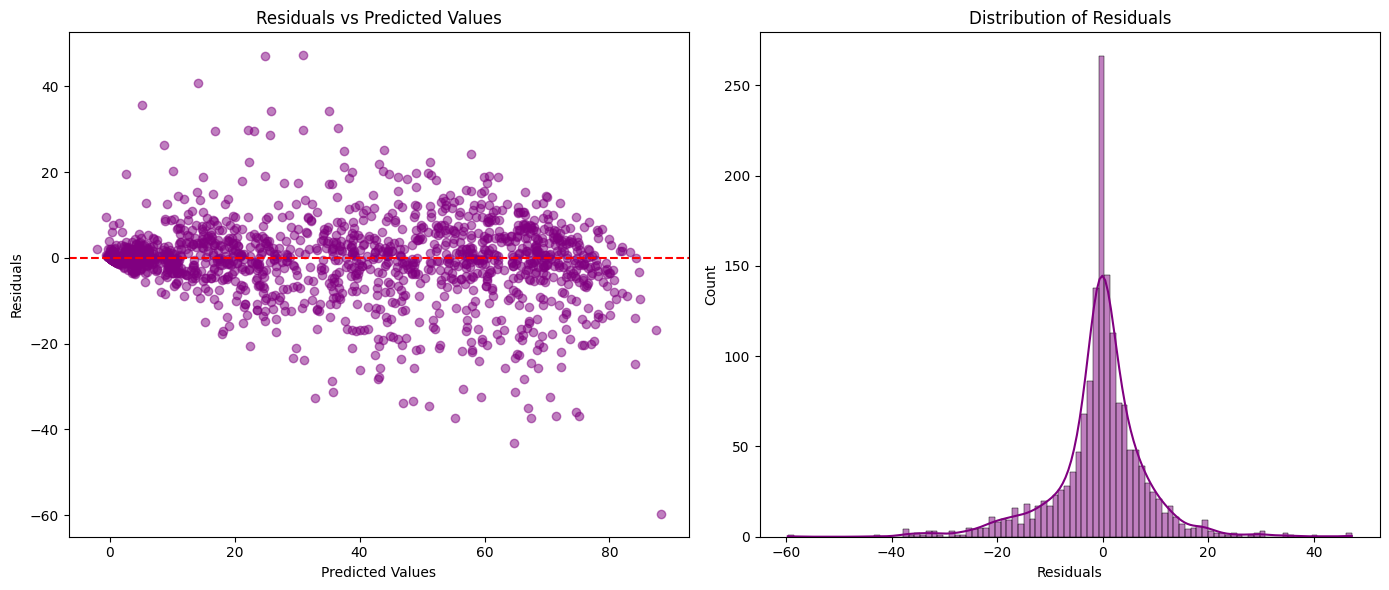

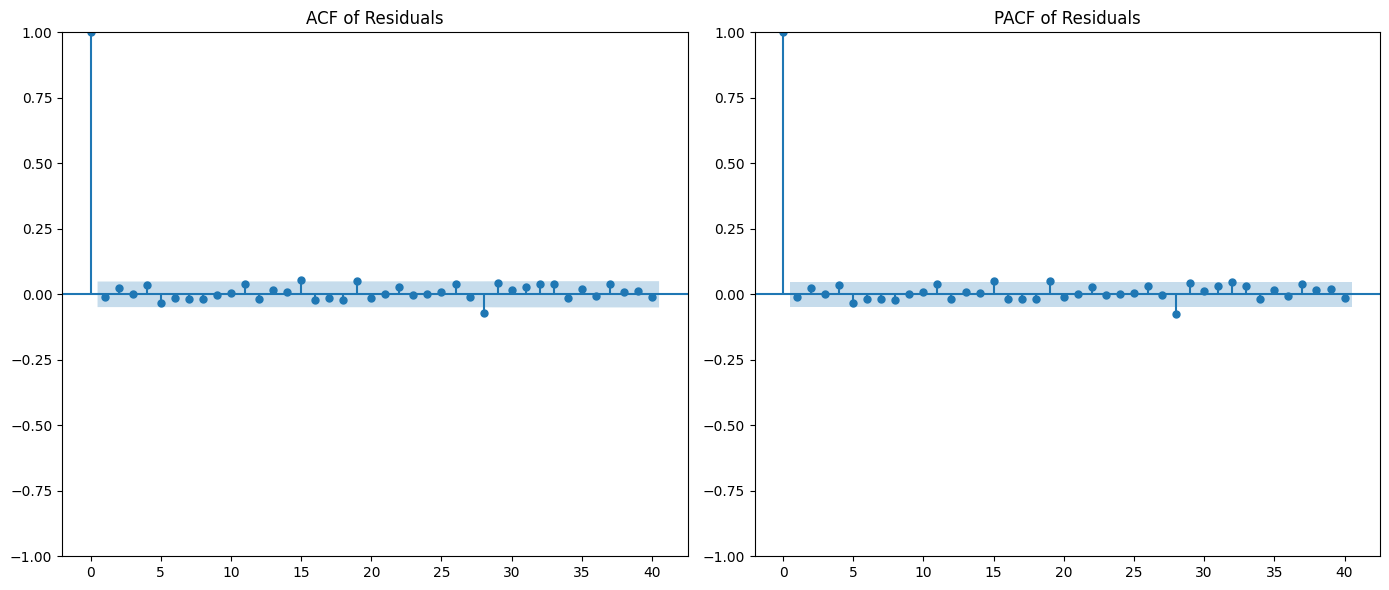

ADF Statistic: -40.48521085609608
p-value: 0.0
Critical Value 1%: -3.4344131164513874
Critical Value 5%: -2.8633346290071326
Critical Value 10%: -2.5677254234217317
Ряд стационарен (отвергаем нулевую гипотезу)


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Предполагается, что y_test и y_pred уже доступны после выполнения модели

# Вычисление остатков
residuals = y_test - y_pred

# Построение графиков остатков
plt.figure(figsize=(14, 6))

# График остатков
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Гистограмма остатков
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Построение ACF и PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Тест Дики-Фуллера на стационарность
adf_result = adfuller(residuals)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value}')

if adf_result[1] < 0.05:
    print("Ряд стационарен (отвергаем нулевую гипотезу)")
else:
    print("Ряд не стационарен (не отвергаем нулевую гипотезу)")
